## Prerequisites


In [42]:
import dotenv

dotenv.load_dotenv()

True

In [43]:
project_names = [
    "gender_female",
    "gender_male",
    "language_de",
    "language_en",
    "language_es",
    "language_fr",
    "language_it",
    "language_ja",
    "language_pt",
]
encoder_ids = [
    ("mert_v1_95m", 768),
    ("whisper_large_v2", 1280),
    ("muq_large_msd", 1024),
    ("muq_mulan_large", 512),
]


## 1. Create CAVs using LogisticRegression for Significance Test


In [44]:
# training meta parameters
num_train_runs = 500
training_sample_frac = 0.25

epochs = 1000
learning_rate = 0.004
dropout_rate = 0.0

use_logistic_regression = False


### Prepare Data


In [45]:
import itertools
import os
import sys

import s3fs
from cavmir.utils import (
    create_in_memory_dataloader,
    train_cav_logistic_regression,
    load_df_and_embeddings,
    store_cav_vector_array,
    store_evaluation_metrics,
    train_cav_classifier,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training


In [ ]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    test_dataloader = create_in_memory_dataloader(df_test)

    training_sample_size = int(len(df) * training_sample_frac)
    print(f"Training sample size: {training_sample_size}")
    print(f"Test sample size: {len(df_test)}")

    cav_vectors = []
    evaluation_metrics = []
    biases = []

    for i in range(num_train_runs):
        sys.stdout.write(f"\rIteration {i + 1}/{num_train_runs}")

        if use_logistic_regression:
            cav_weight, cav_bias, evaluation_metric = train_cav_logistic_regression(
                random_state=i,
                df=df,
                project_name=project_name,
                training_sample_size=training_sample_size,
                embedding_dim=embedding_dim,
                df_test=df_test,
                plot_evaluation=True,
            )
        else:
            cav_weight, cav_bias, evaluation_metric = train_cav_classifier(
                random_state=i,
                df=df,
                project_name=project_name,
                training_sample_size=training_sample_size,
                validation_sample_size=training_sample_size,
                learning_rate=learning_rate,
                epochs=epochs,
                dropout_rate=dropout_rate,
                embedding_dim=embedding_dim,
                df_test=df_test,
                plot_evaluation=False,
                verbose_steps=-1,
            )

        cav_vectors.append(cav_weight)
        evaluation_metrics.append(evaluation_metric)
        biases.append(cav_bias)

    store_cav_vector_array(
        cav_vectors,
        f"cav_weight_ttest_{project_name}.npy",
        encoder_id,
        project_name,
    )
    store_cav_vector_array(
        biases, f"cav_bias_ttest_{project_name}.npy", encoder_id, project_name
    )
    store_evaluation_metrics(
        evaluation_metrics,
        f"evaluation_metrics_ttest_{project_name}.json",
        encoder_id,
        project_name,
    )



Fitting project: gender_female for encoder: mert_v1_95m
Training sample size: 548
Test sample size: 9798
Iteration 212/500

## 2. Train CAV for Qualitative Tests


In [7]:
train_val_split = 0.9

# training parameters
epochs = 10000
learning_rate = 0.004
dropout_rate = 0.0

### Prepare Data


In [8]:
import itertools
import os

import s3fs
from cavmir.utils import (
    store_cav_vector_array,
    store_evaluation_metrics,
    train_cav_classifier,
    train_cav_logistic_regression,
    load_df_and_embeddings,
    create_in_memory_dataloader,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training



Fitting project: gender_female for encoder: mert_v1_95m
Training sample size: 1974
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 713
Training completed. Saving loss history to trainings/gender_female/


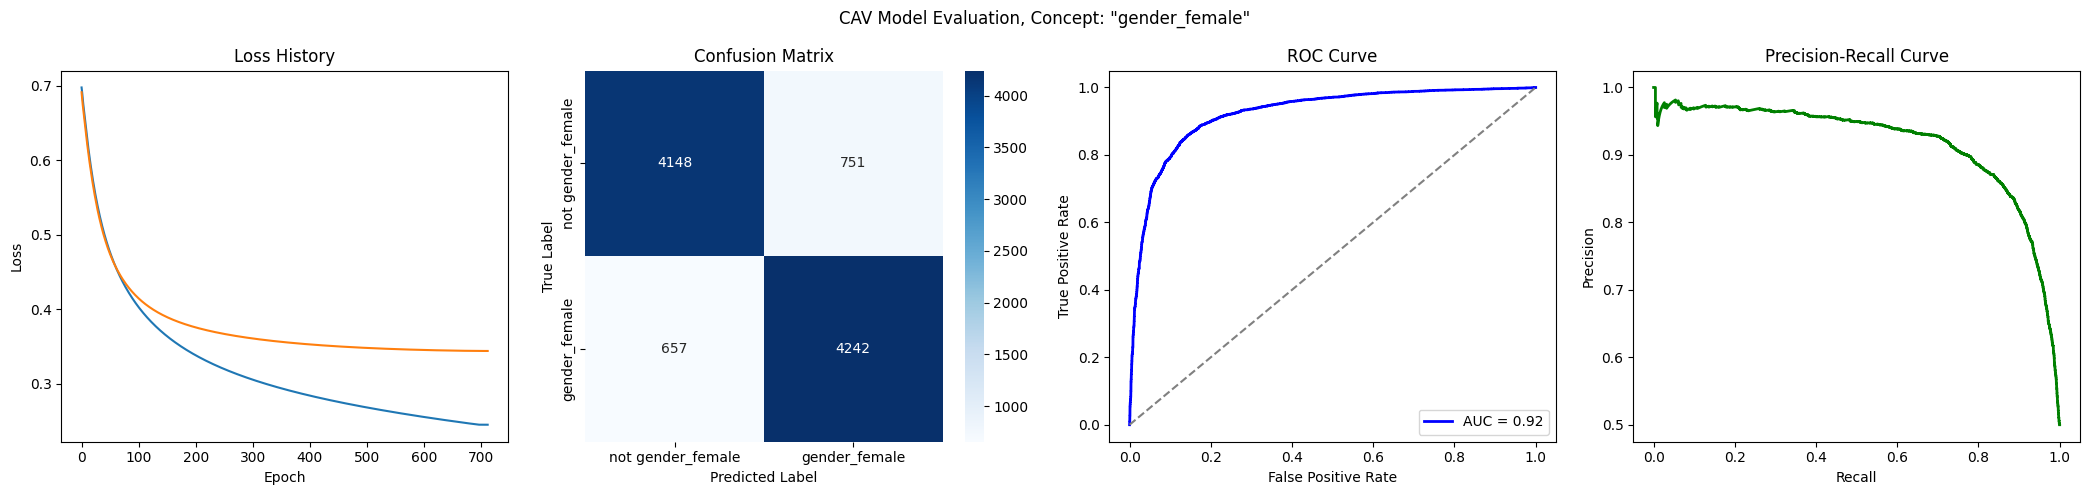


Fitting project: gender_female for encoder: whisper_large_v2
Training sample size: 1974
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 952
Training completed. Saving loss history to trainings/gender_female/


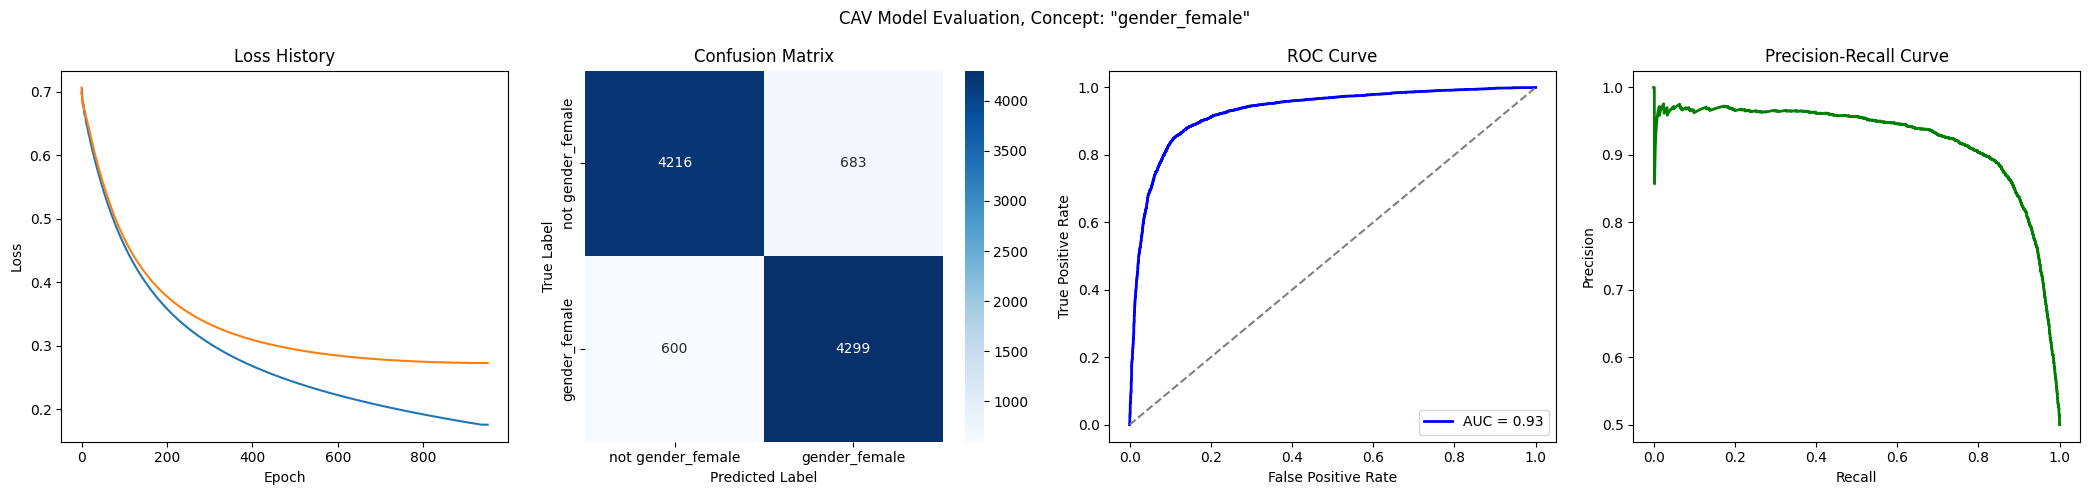


Fitting project: gender_female for encoder: muq_large_msd
Training sample size: 1974
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 203
Training completed. Saving loss history to trainings/gender_female/


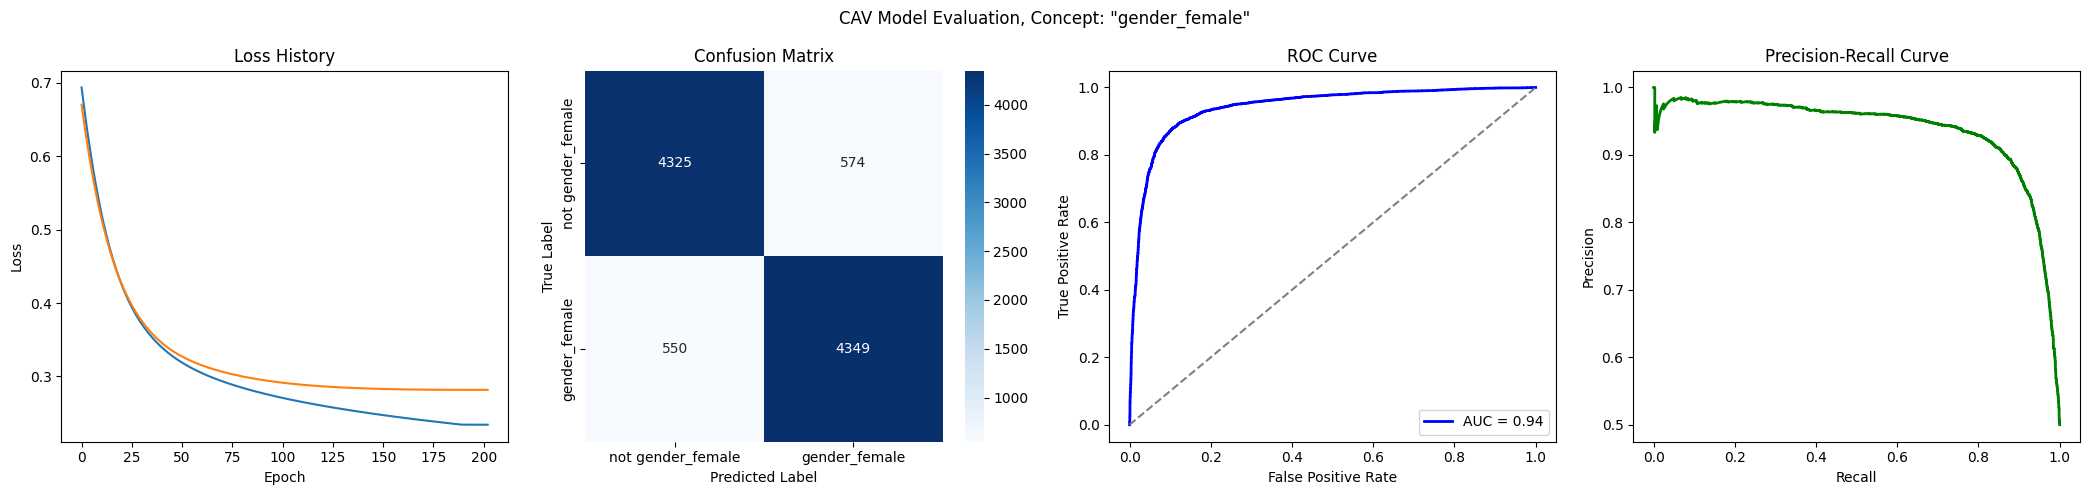


Fitting project: gender_female for encoder: muq_mulan_large
Training sample size: 1974
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 6719
Training completed. Saving loss history to trainings/gender_female/


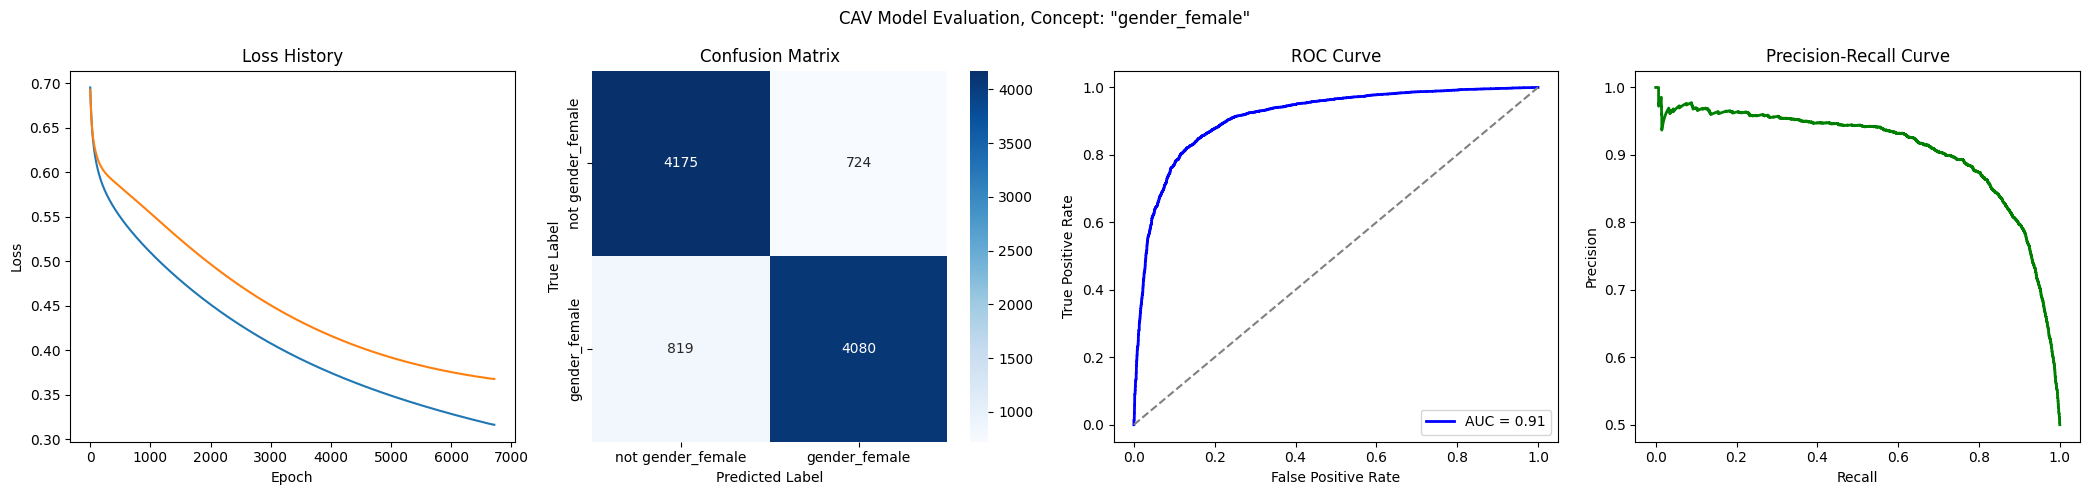


Fitting project: gender_male for encoder: mert_v1_95m
Training sample size: 1972
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 444
Training completed. Saving loss history to trainings/gender_male/


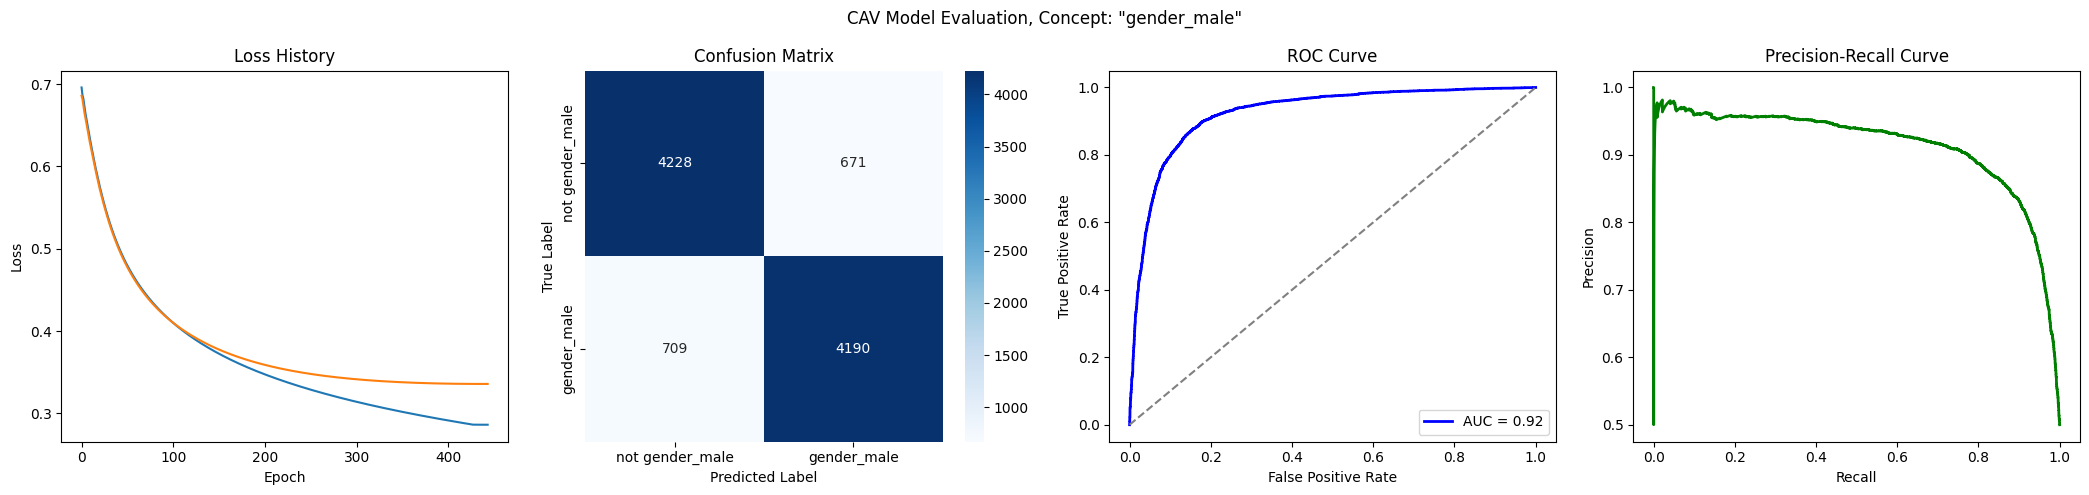


Fitting project: gender_male for encoder: whisper_large_v2
Training sample size: 1972
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 540
Training completed. Saving loss history to trainings/gender_male/


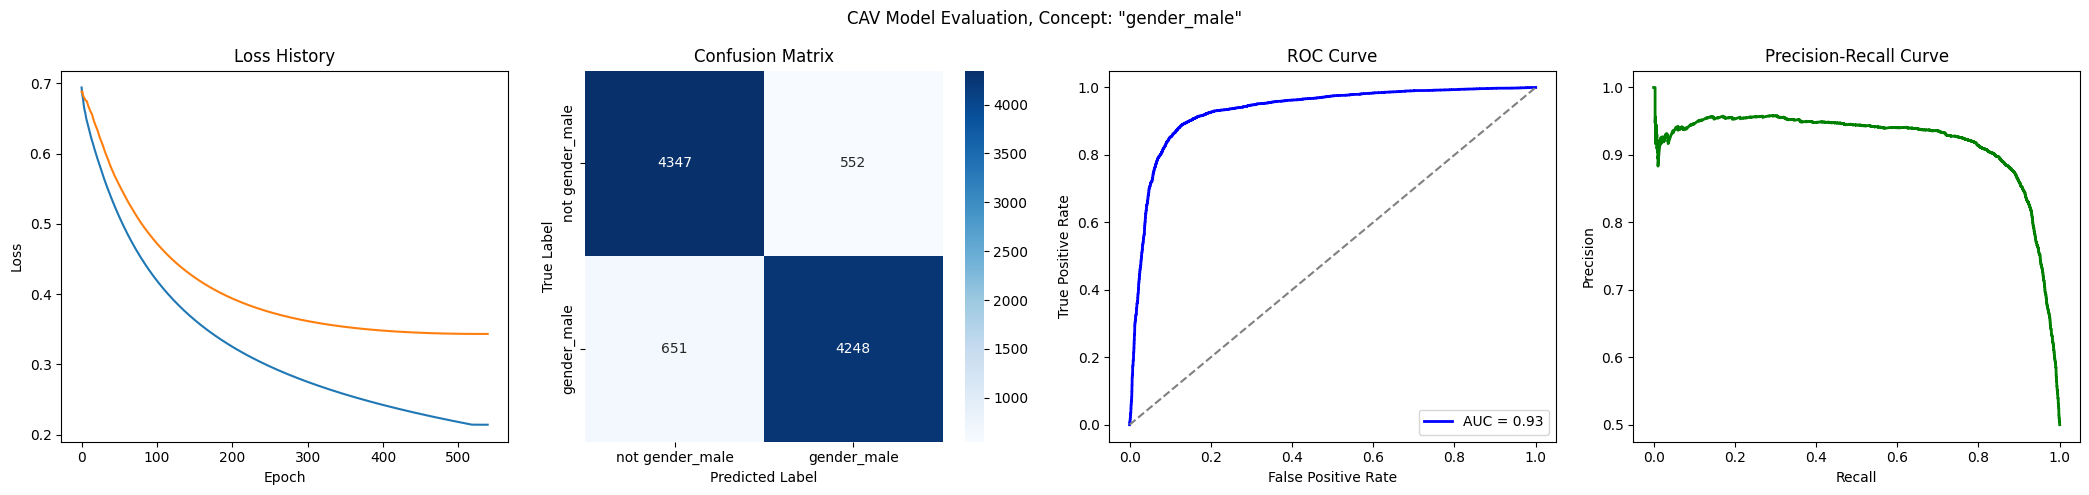


Fitting project: gender_male for encoder: muq_large_msd
Training sample size: 1972
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 144
Training completed. Saving loss history to trainings/gender_male/


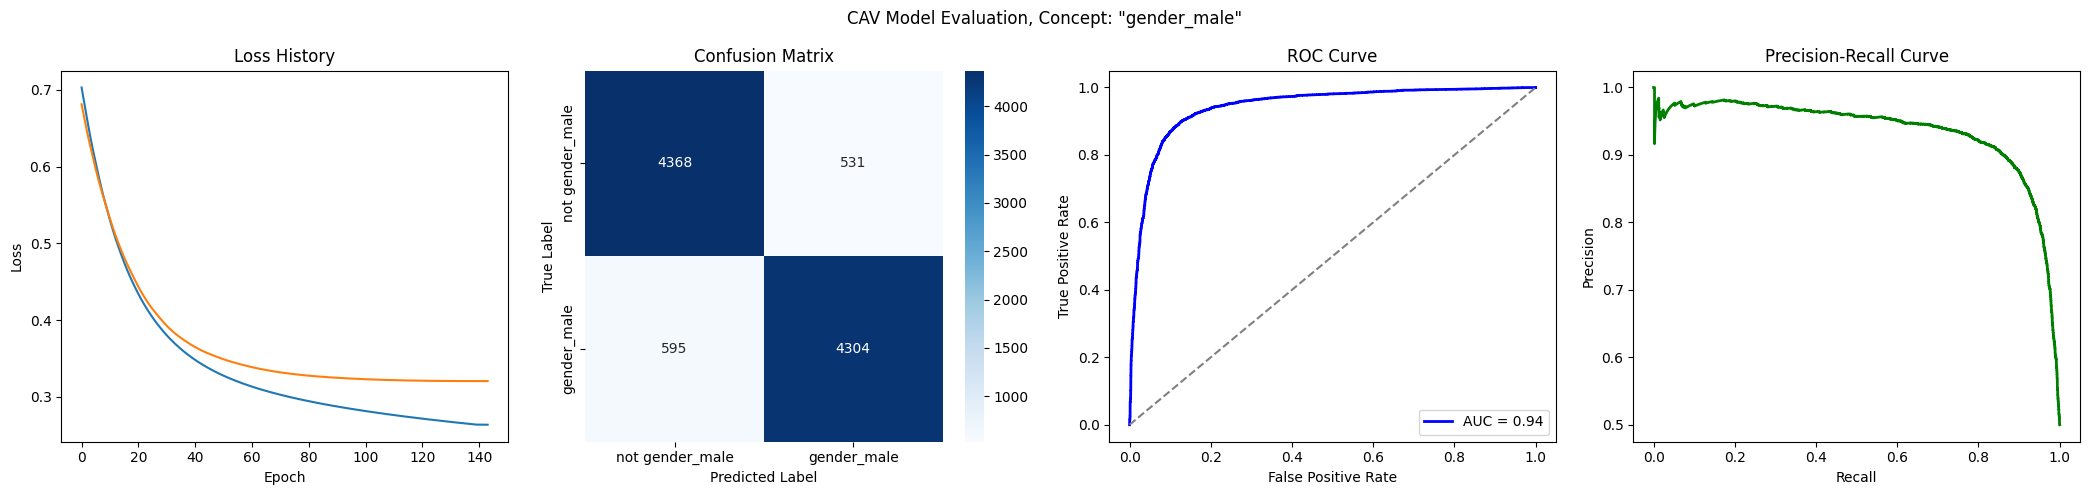


Fitting project: gender_male for encoder: muq_mulan_large
Training sample size: 1972
Validation sample size: 220
Test sample size: 9798
Early stopping at epoch 6121
Training completed. Saving loss history to trainings/gender_male/


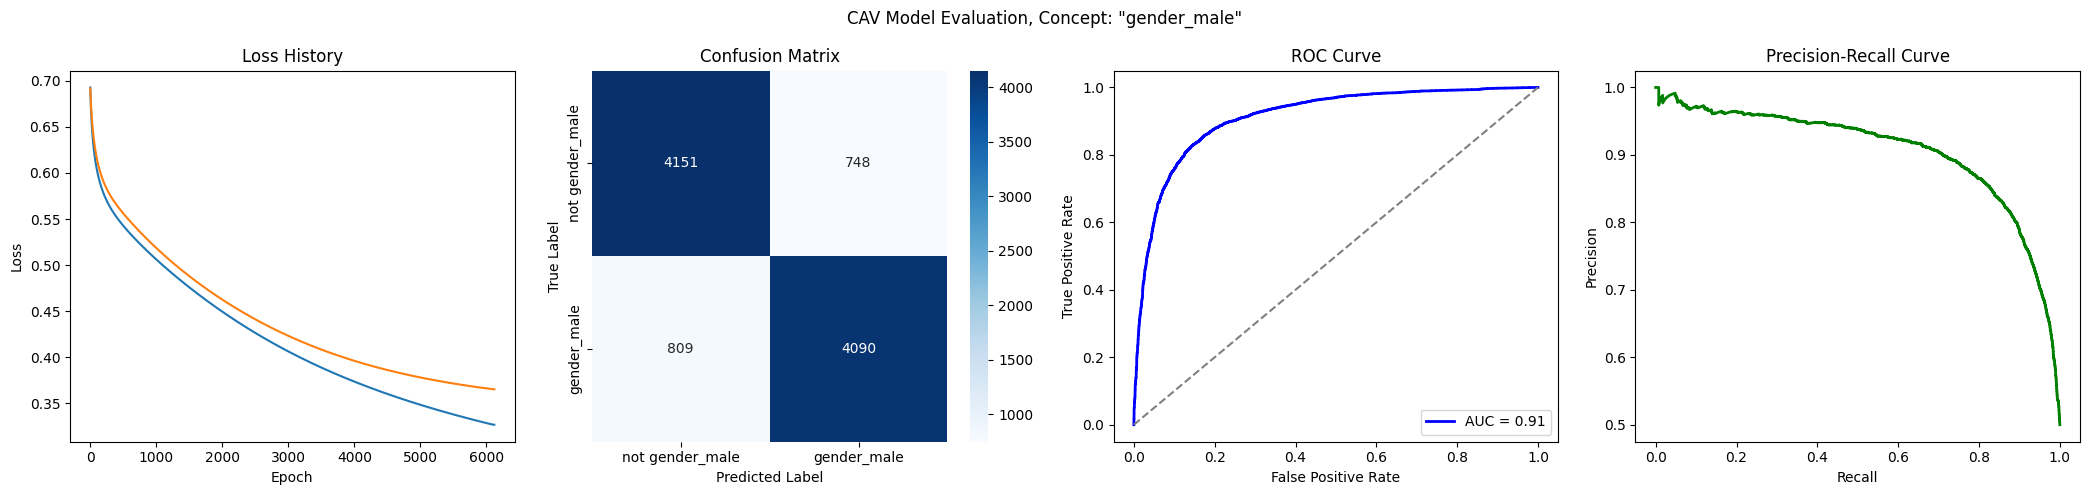


Fitting project: language_de for encoder: mert_v1_95m
Training sample size: 381
Validation sample size: 43
Test sample size: 1800
Early stopping at epoch 163
Training completed. Saving loss history to trainings/language_de/


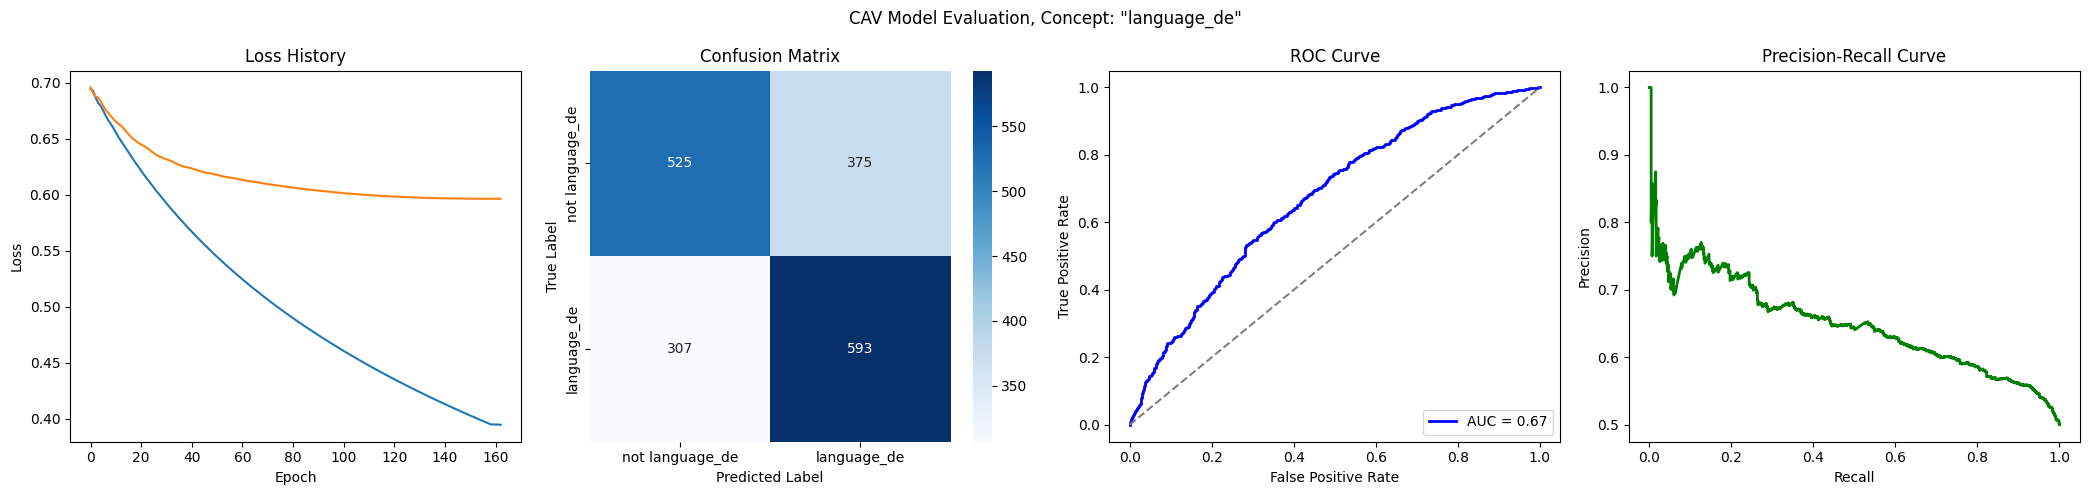


Fitting project: language_de for encoder: whisper_large_v2
Training sample size: 381
Validation sample size: 43
Test sample size: 1800
Early stopping at epoch 228
Training completed. Saving loss history to trainings/language_de/


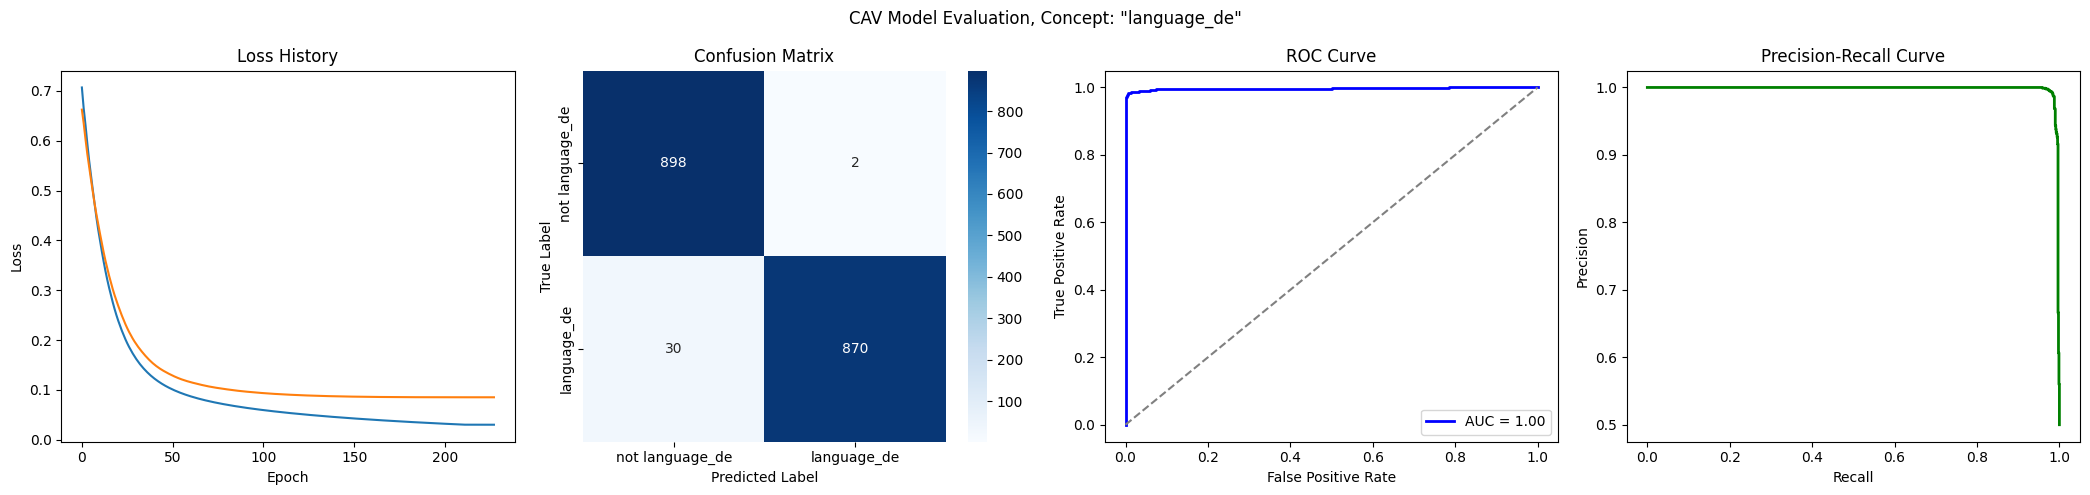


Fitting project: language_de for encoder: muq_large_msd
Training sample size: 381
Validation sample size: 43
Test sample size: 1800
Early stopping at epoch 109
Training completed. Saving loss history to trainings/language_de/


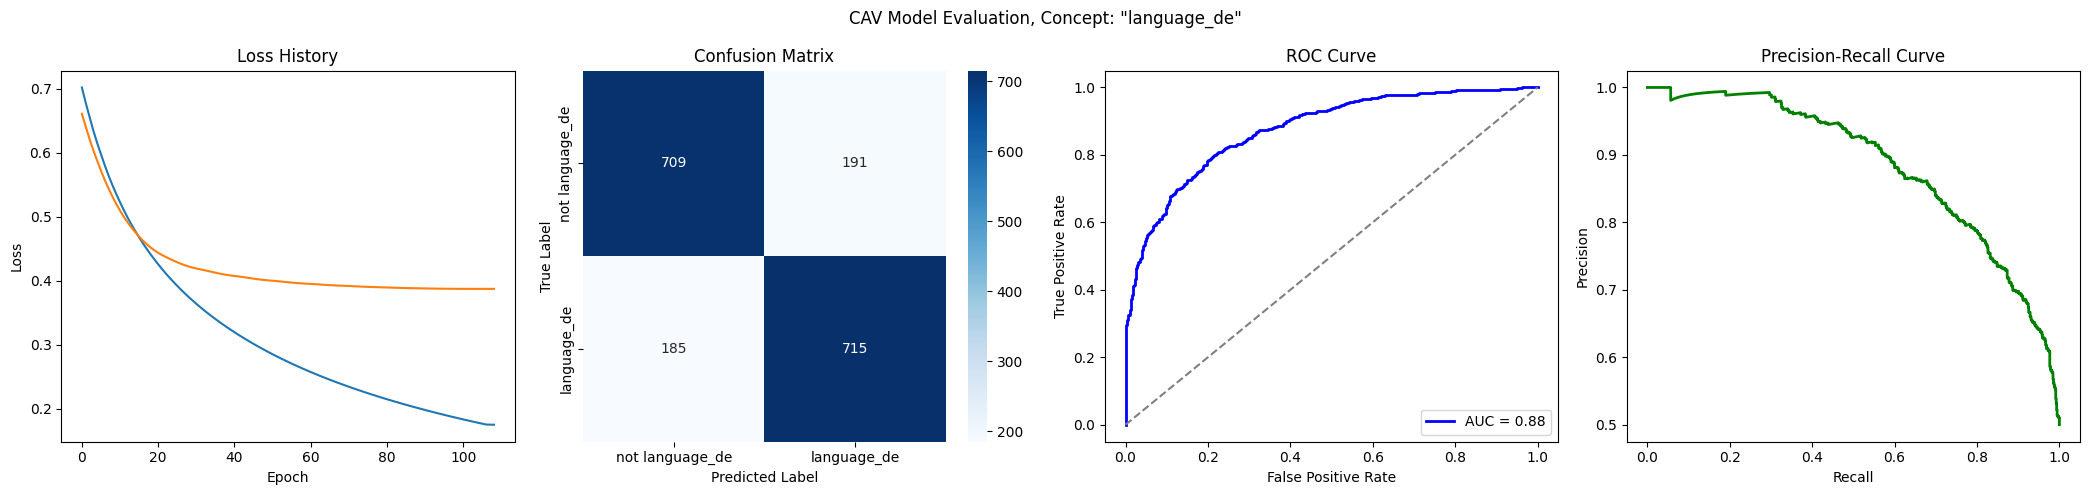


Fitting project: language_de for encoder: muq_mulan_large
Training sample size: 381
Validation sample size: 43
Test sample size: 1800
Early stopping at epoch 1320
Training completed. Saving loss history to trainings/language_de/


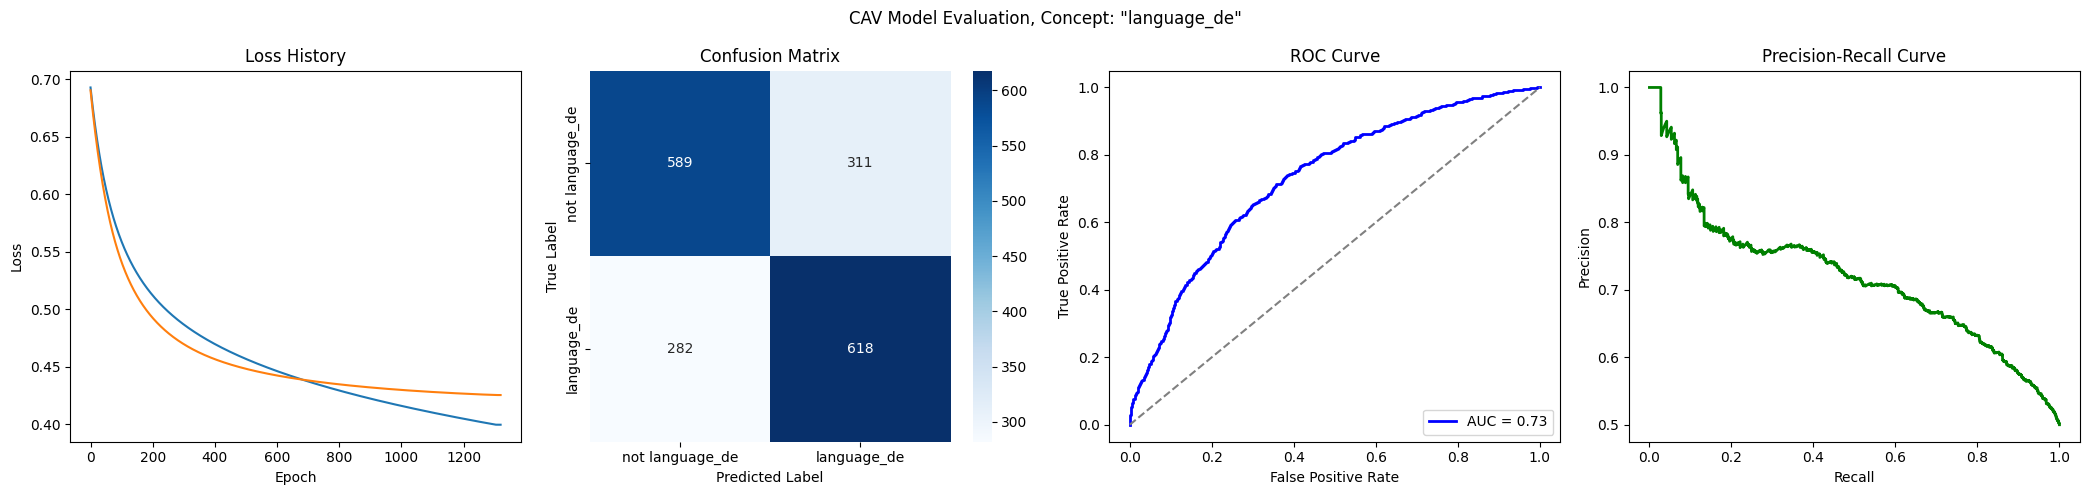


Fitting project: language_en for encoder: mert_v1_95m
Training sample size: 831
Validation sample size: 93
Test sample size: 10090
Early stopping at epoch 50
Training completed. Saving loss history to trainings/language_en/


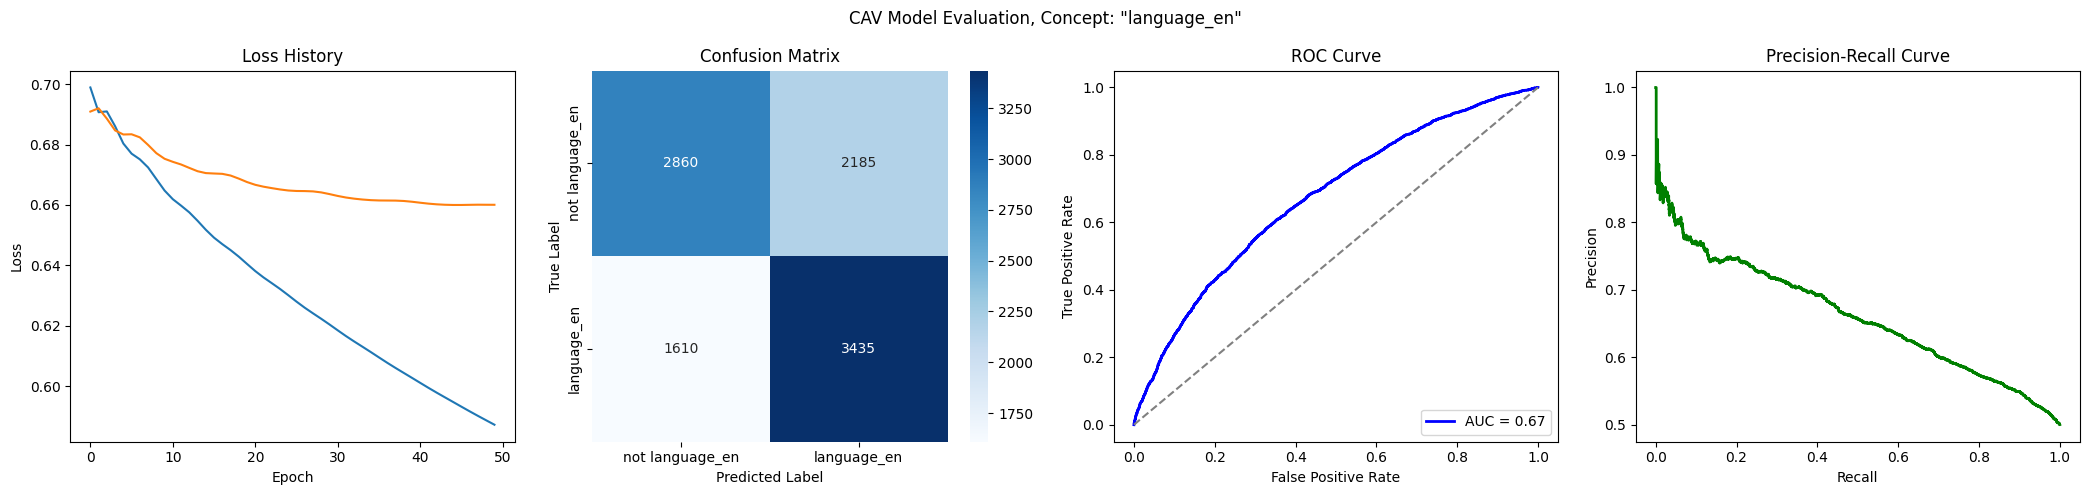


Fitting project: language_en for encoder: whisper_large_v2
Training sample size: 831
Validation sample size: 93
Test sample size: 10090
Early stopping at epoch 267
Training completed. Saving loss history to trainings/language_en/


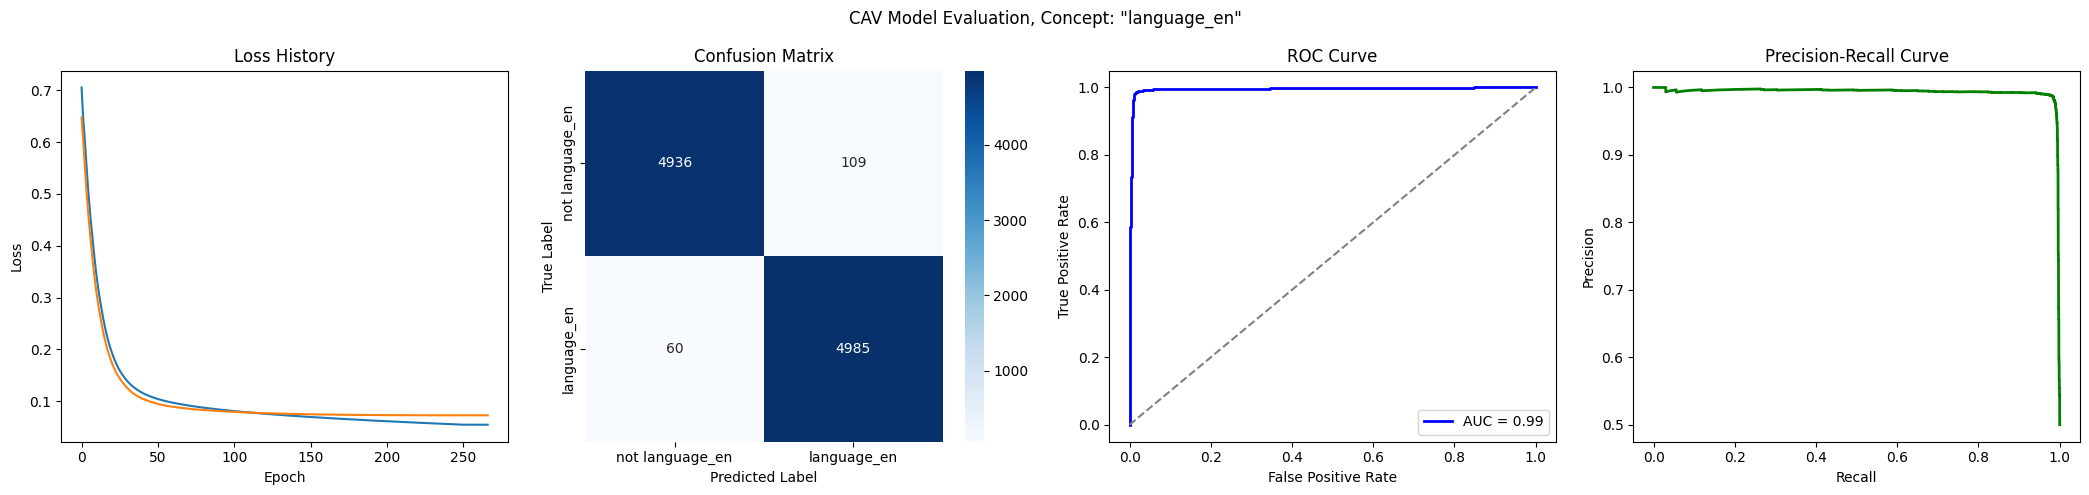


Fitting project: language_en for encoder: muq_large_msd
Training sample size: 831
Validation sample size: 93
Test sample size: 10090
Early stopping at epoch 148
Training completed. Saving loss history to trainings/language_en/


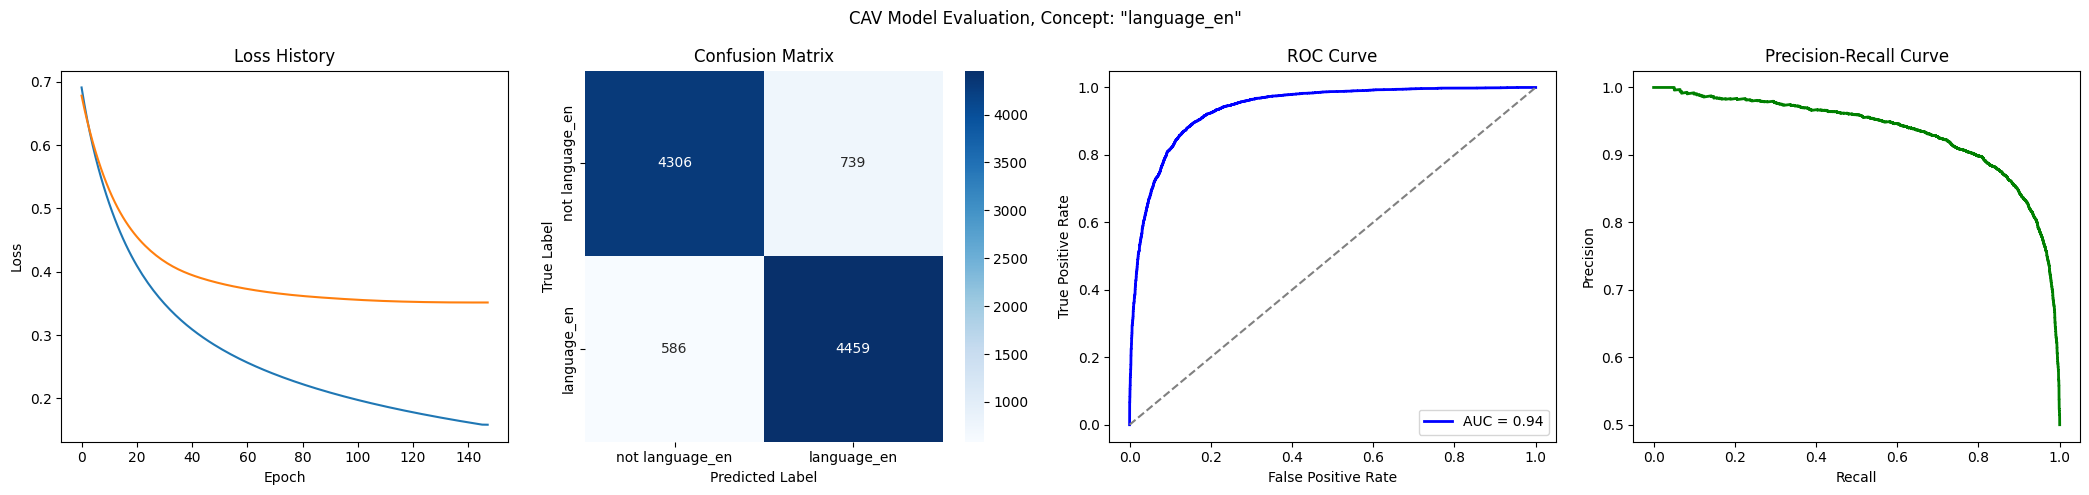


Fitting project: language_en for encoder: muq_mulan_large
Training sample size: 831
Validation sample size: 93
Test sample size: 10090
Early stopping at epoch 5766
Training completed. Saving loss history to trainings/language_en/


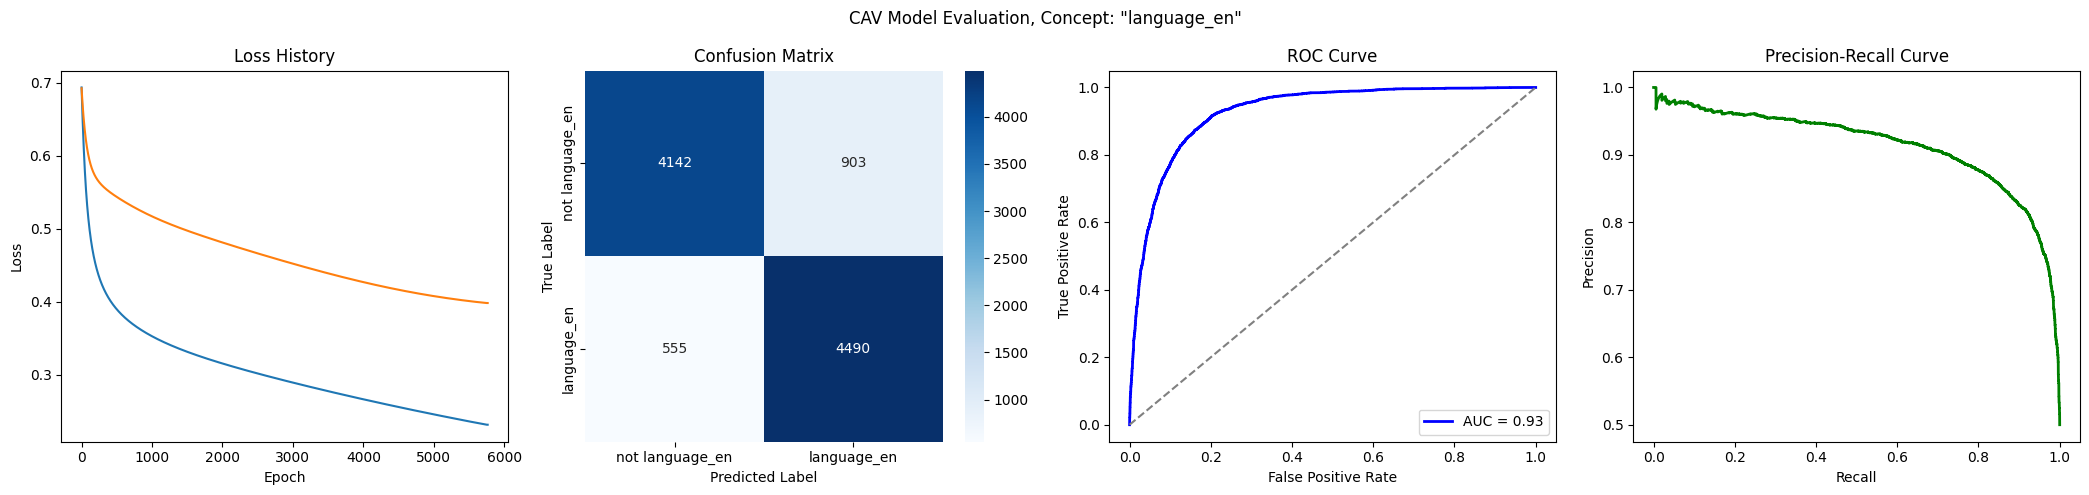


Fitting project: language_es for encoder: mert_v1_95m
Training sample size: 313
Validation sample size: 35
Test sample size: 1180
Early stopping at epoch 8
Training completed. Saving loss history to trainings/language_es/


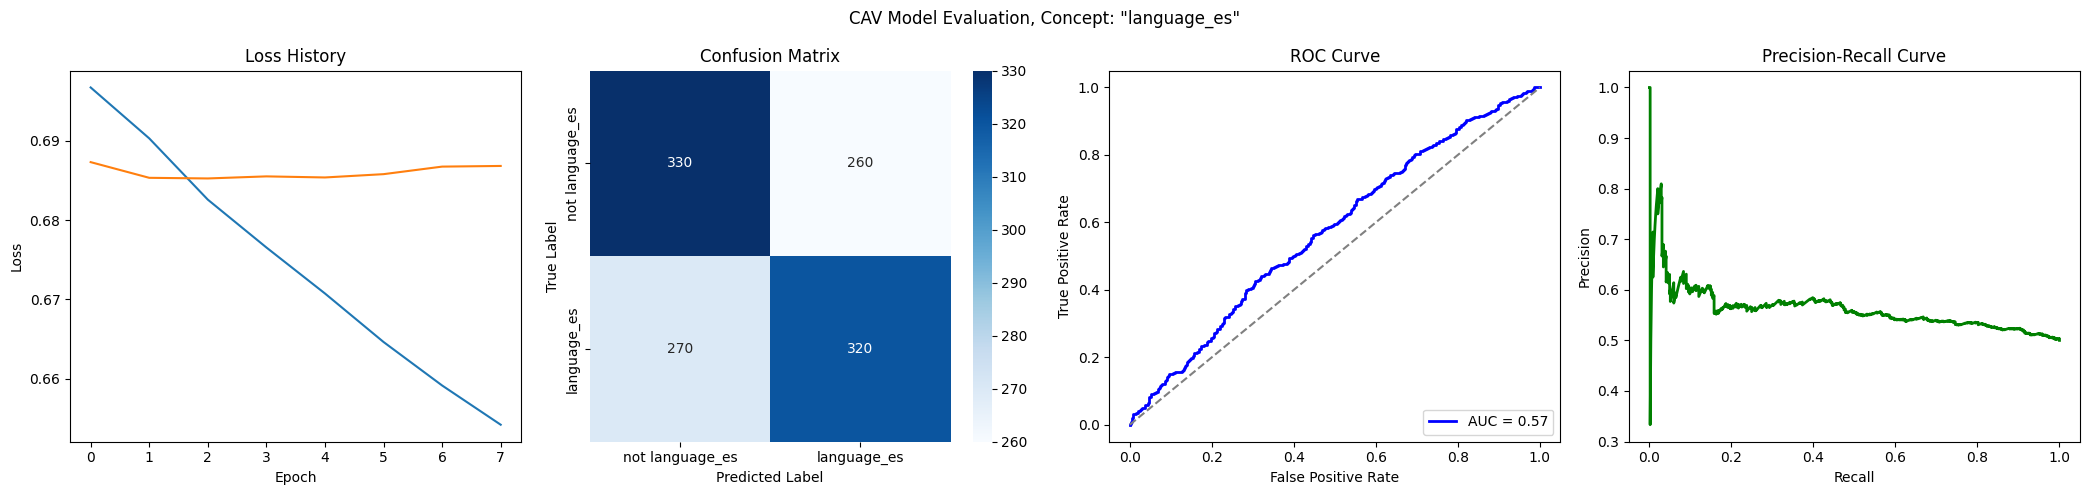


Fitting project: language_es for encoder: whisper_large_v2
Training sample size: 313
Validation sample size: 35
Test sample size: 1180
Early stopping at epoch 478
Training completed. Saving loss history to trainings/language_es/


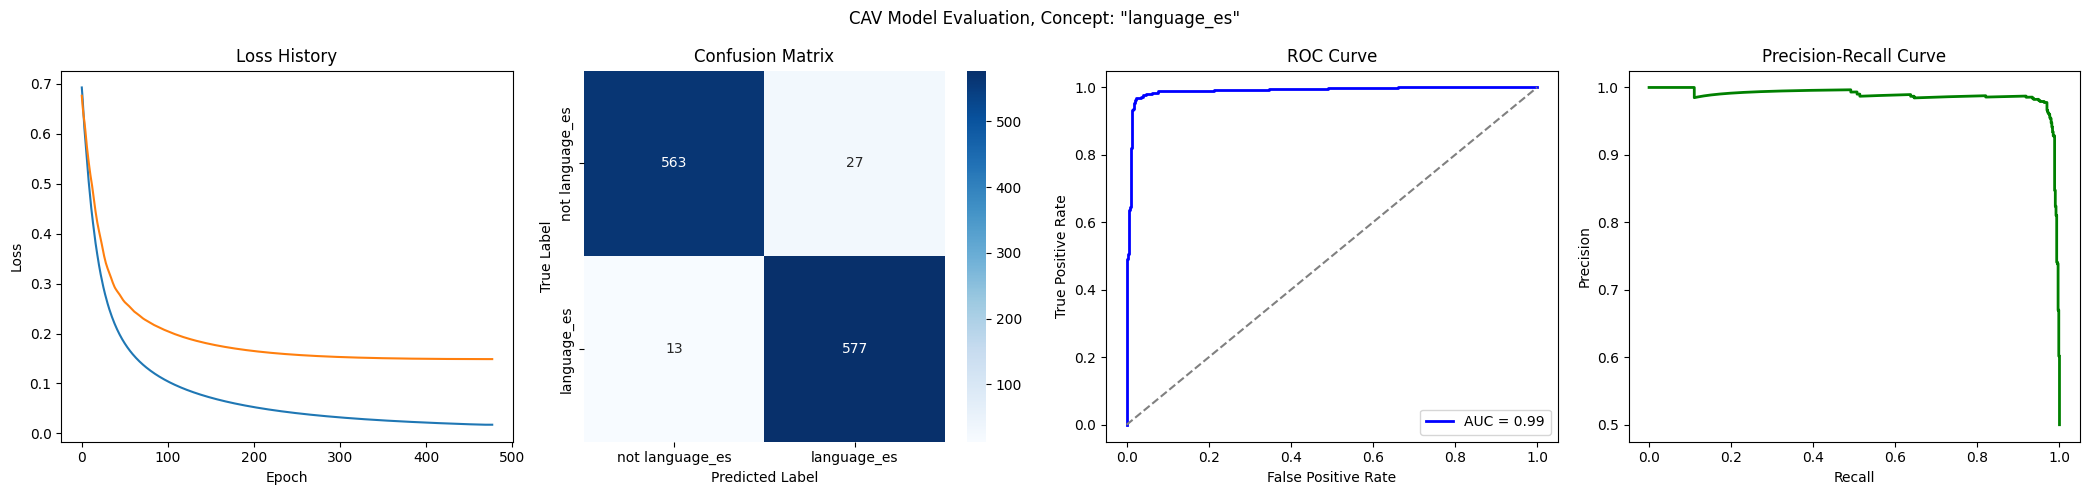


Fitting project: language_es for encoder: muq_large_msd
Training sample size: 313
Validation sample size: 35
Test sample size: 1180
Early stopping at epoch 6
Training completed. Saving loss history to trainings/language_es/


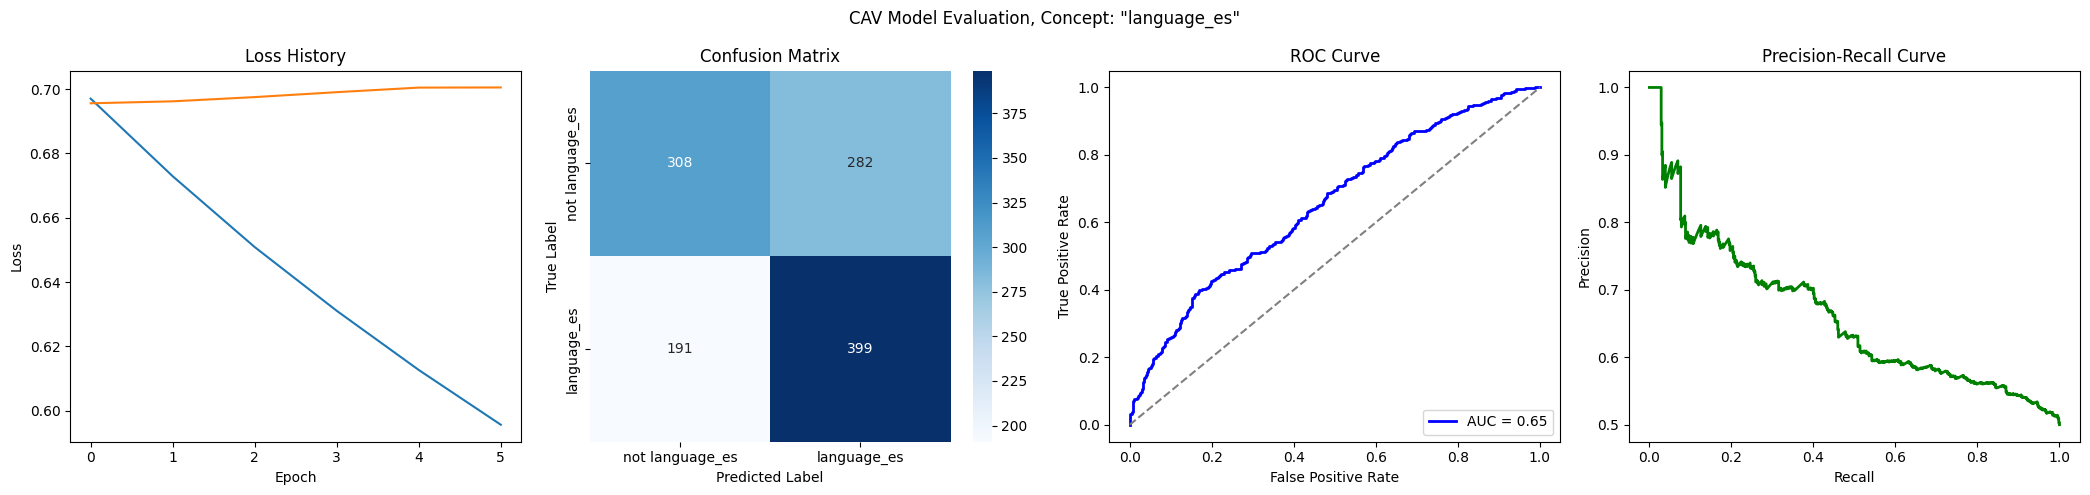


Fitting project: language_es for encoder: muq_mulan_large
Training sample size: 313
Validation sample size: 35
Test sample size: 1180
Early stopping at epoch 77
Training completed. Saving loss history to trainings/language_es/


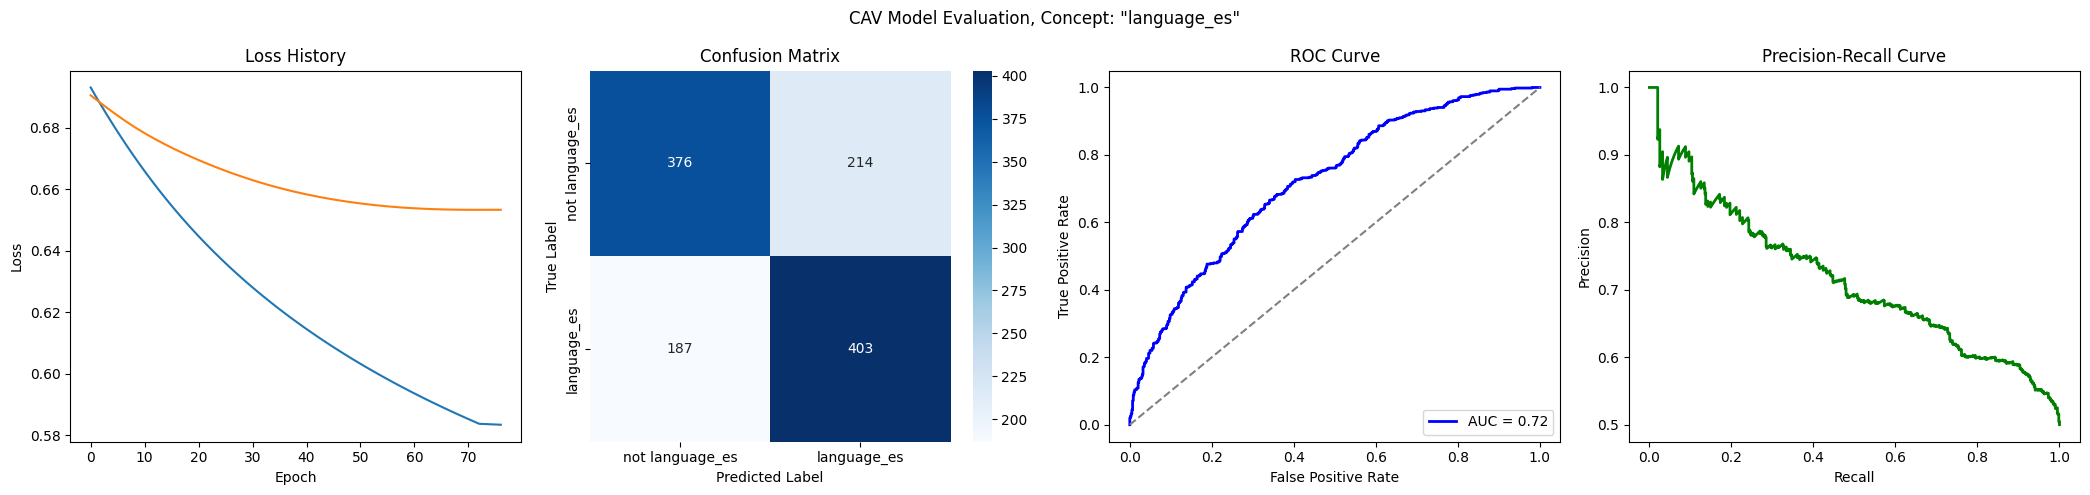


Fitting project: language_fr for encoder: mert_v1_95m
Training sample size: 457
Validation sample size: 51
Test sample size: 6476
Early stopping at epoch 183
Training completed. Saving loss history to trainings/language_fr/


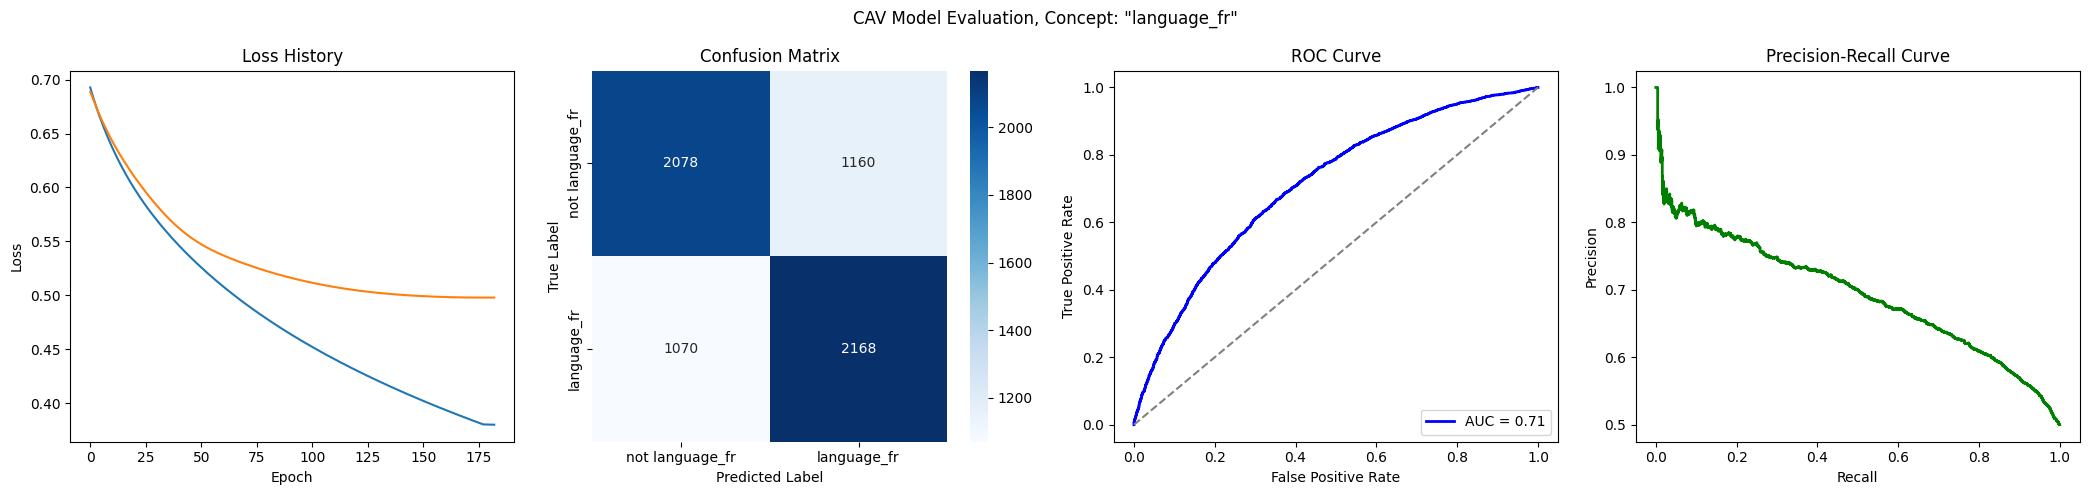


Fitting project: language_fr for encoder: whisper_large_v2
Training sample size: 457
Validation sample size: 51
Test sample size: 6476
Training completed. Saving loss history to trainings/language_fr/


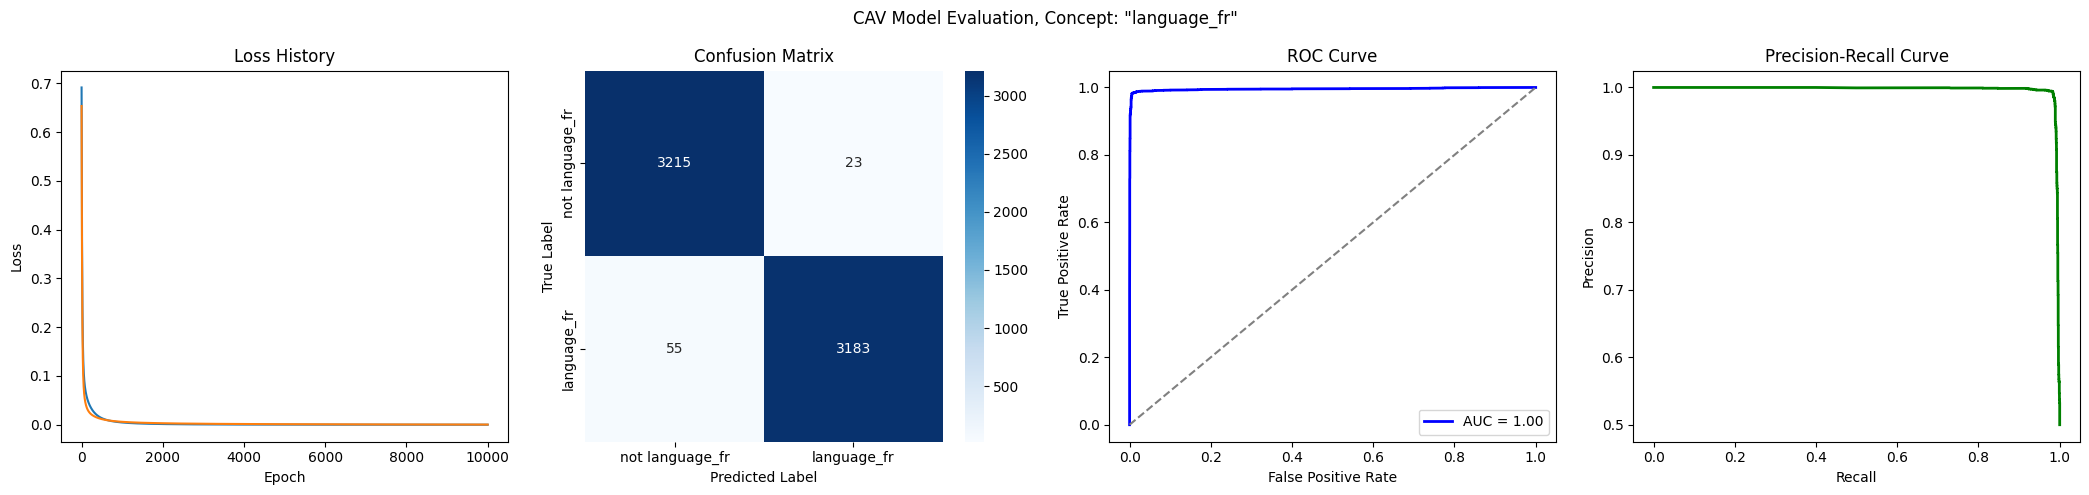


Fitting project: language_fr for encoder: muq_large_msd
Training sample size: 457
Validation sample size: 51
Test sample size: 6476
Early stopping at epoch 153
Training completed. Saving loss history to trainings/language_fr/


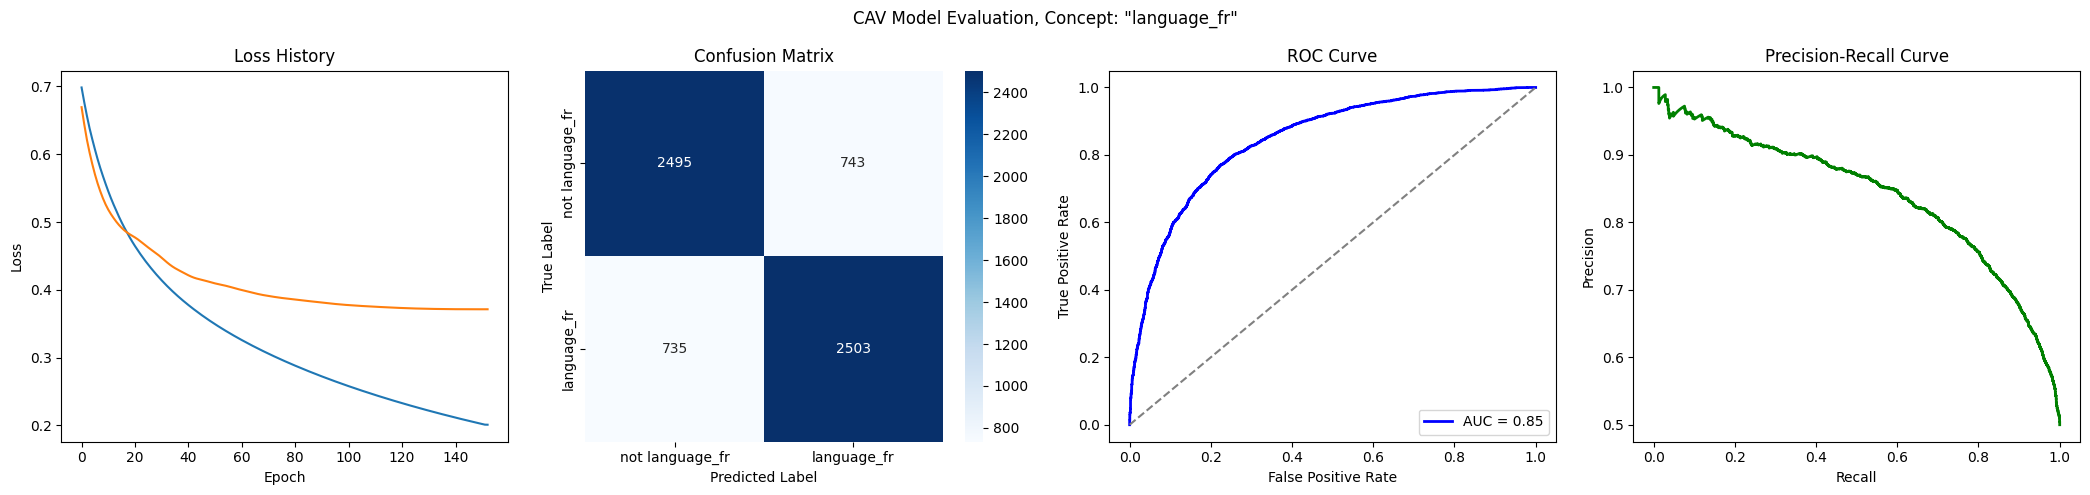


Fitting project: language_fr for encoder: muq_mulan_large
Training sample size: 457
Validation sample size: 51
Test sample size: 6476
Early stopping at epoch 352
Training completed. Saving loss history to trainings/language_fr/


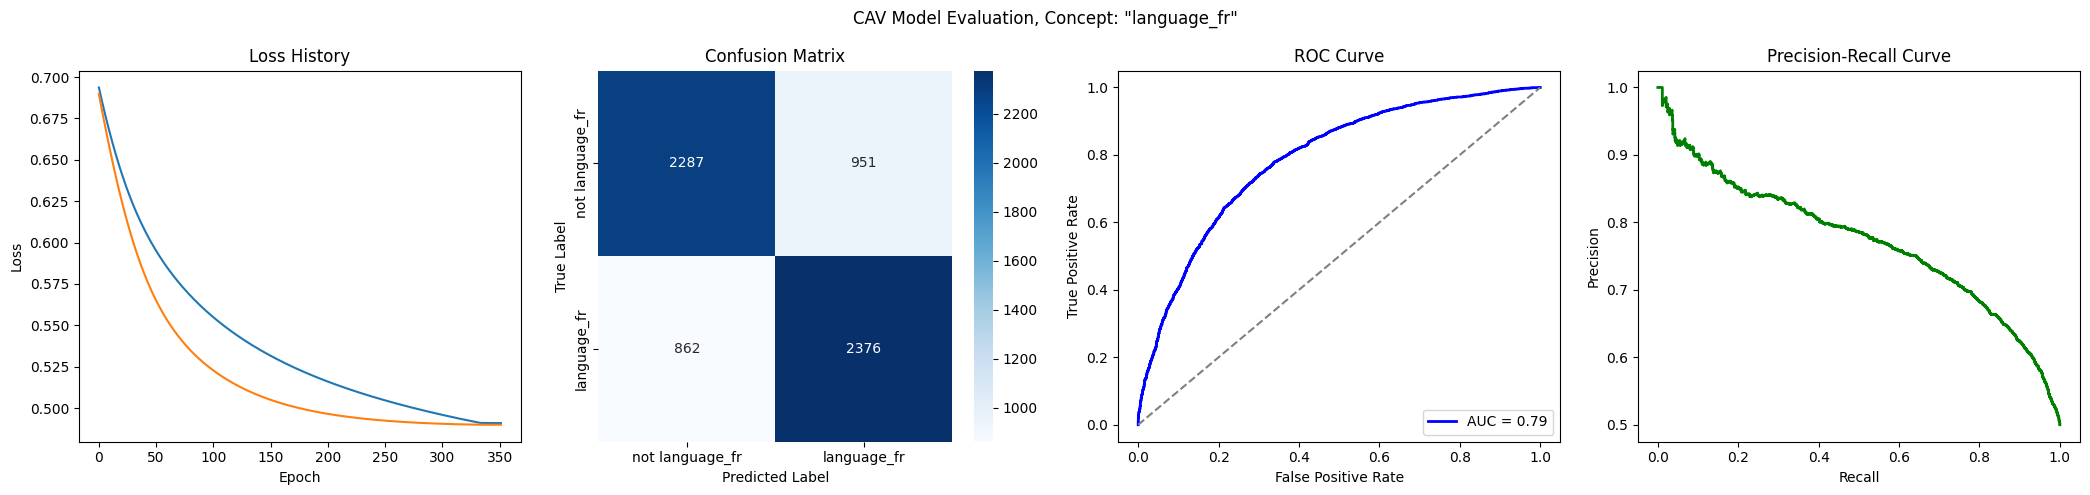


Fitting project: language_it for encoder: mert_v1_95m
Training sample size: 369
Validation sample size: 41
Test sample size: 3122
Early stopping at epoch 29
Training completed. Saving loss history to trainings/language_it/


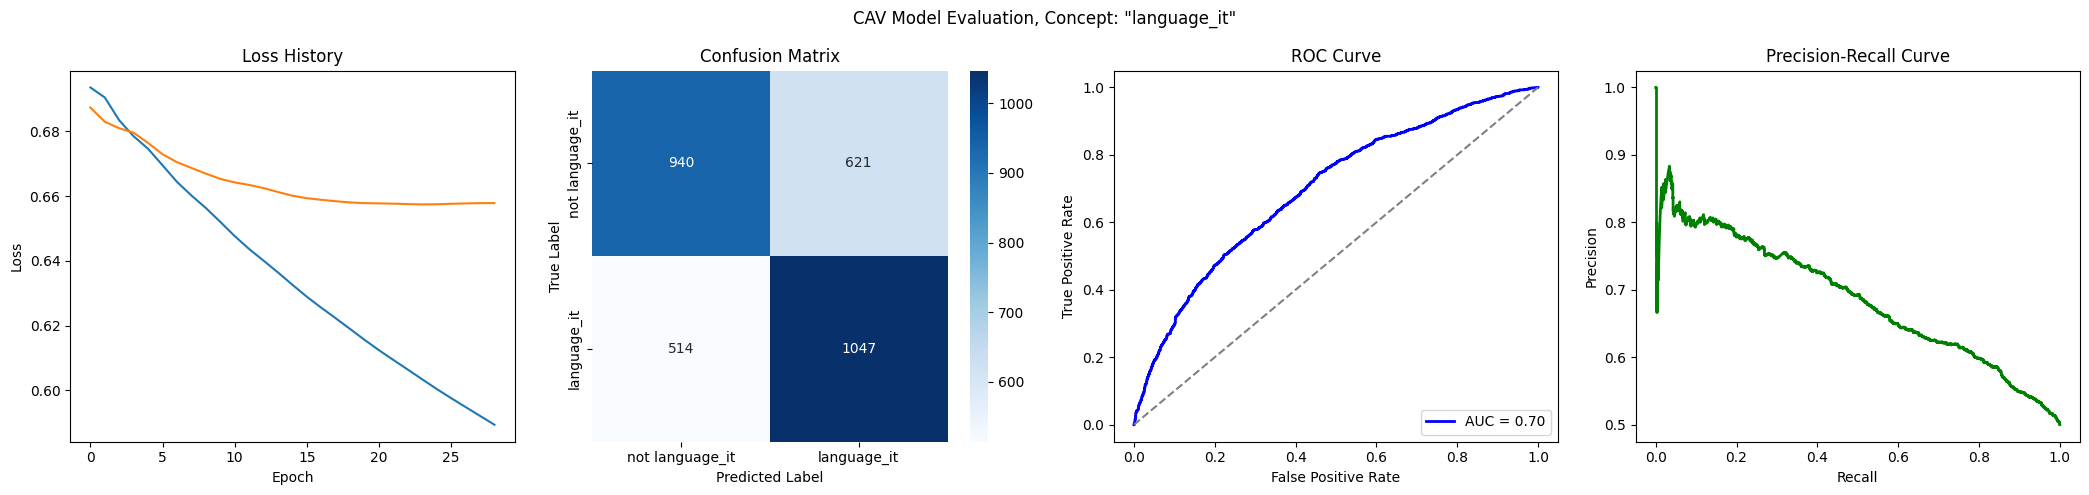


Fitting project: language_it for encoder: whisper_large_v2
Training sample size: 369
Validation sample size: 41
Test sample size: 3122
Training completed. Saving loss history to trainings/language_it/


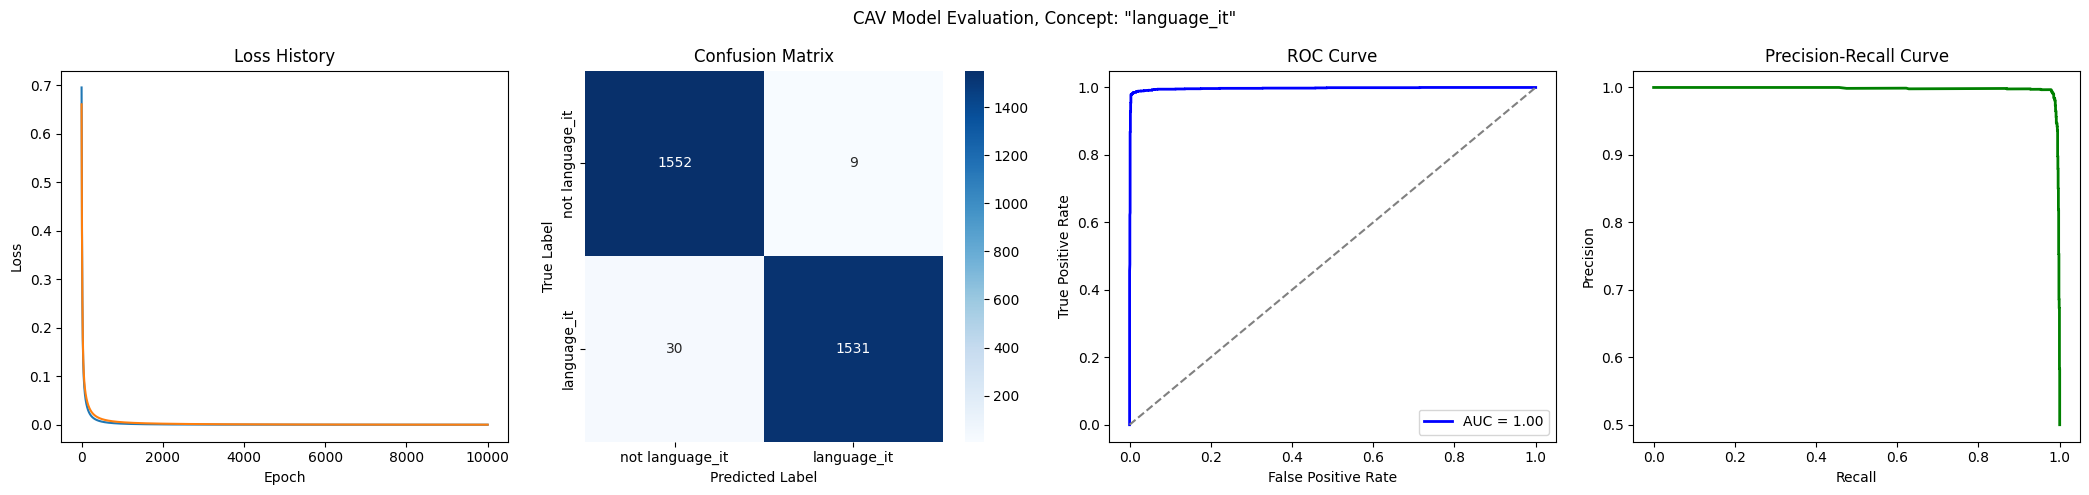


Fitting project: language_it for encoder: muq_large_msd
Training sample size: 369
Validation sample size: 41
Test sample size: 3122
Early stopping at epoch 31
Training completed. Saving loss history to trainings/language_it/


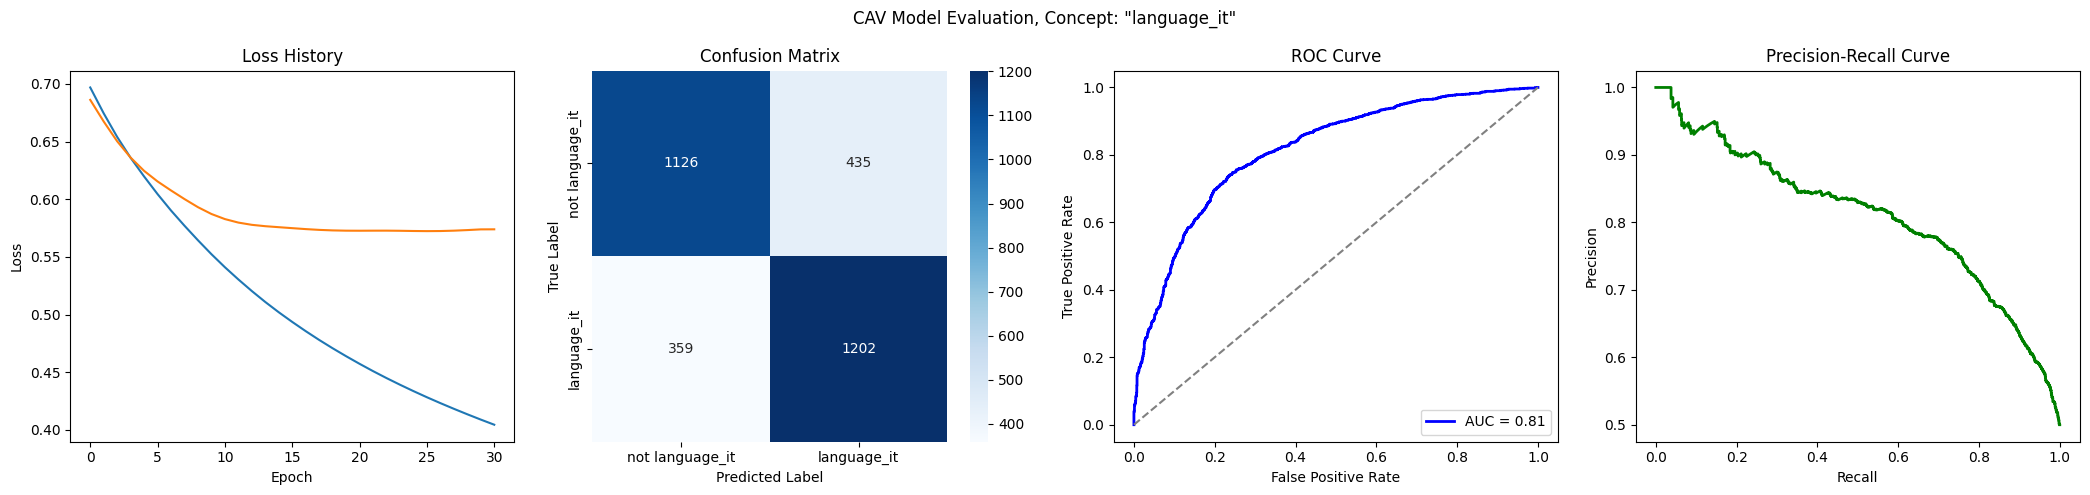


Fitting project: language_it for encoder: muq_mulan_large
Training sample size: 369
Validation sample size: 41
Test sample size: 3122
Early stopping at epoch 173
Training completed. Saving loss history to trainings/language_it/


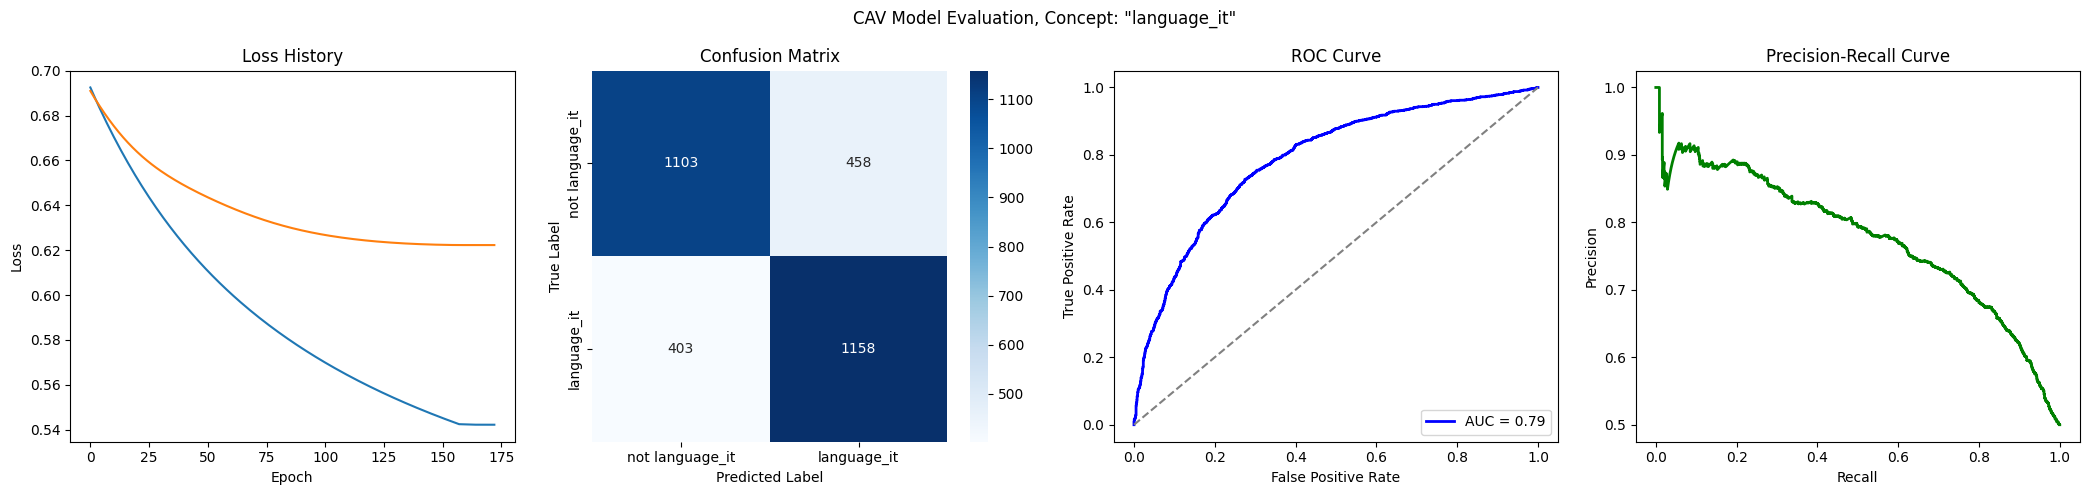


Fitting project: language_ja for encoder: mert_v1_95m
Training sample size: 403
Validation sample size: 45
Test sample size: 1040
Early stopping at epoch 160
Training completed. Saving loss history to trainings/language_ja/


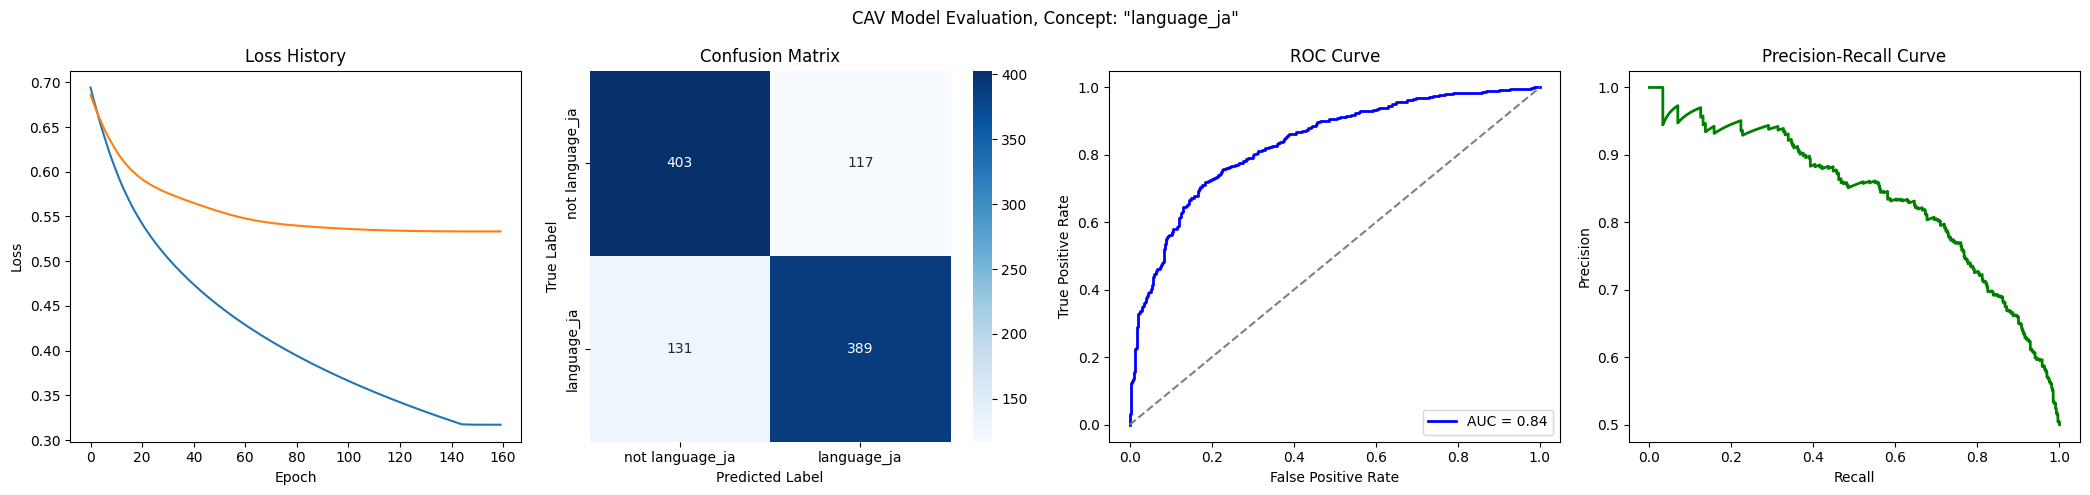


Fitting project: language_ja for encoder: whisper_large_v2
Training sample size: 403
Validation sample size: 45
Test sample size: 1040
Early stopping at epoch 306
Training completed. Saving loss history to trainings/language_ja/


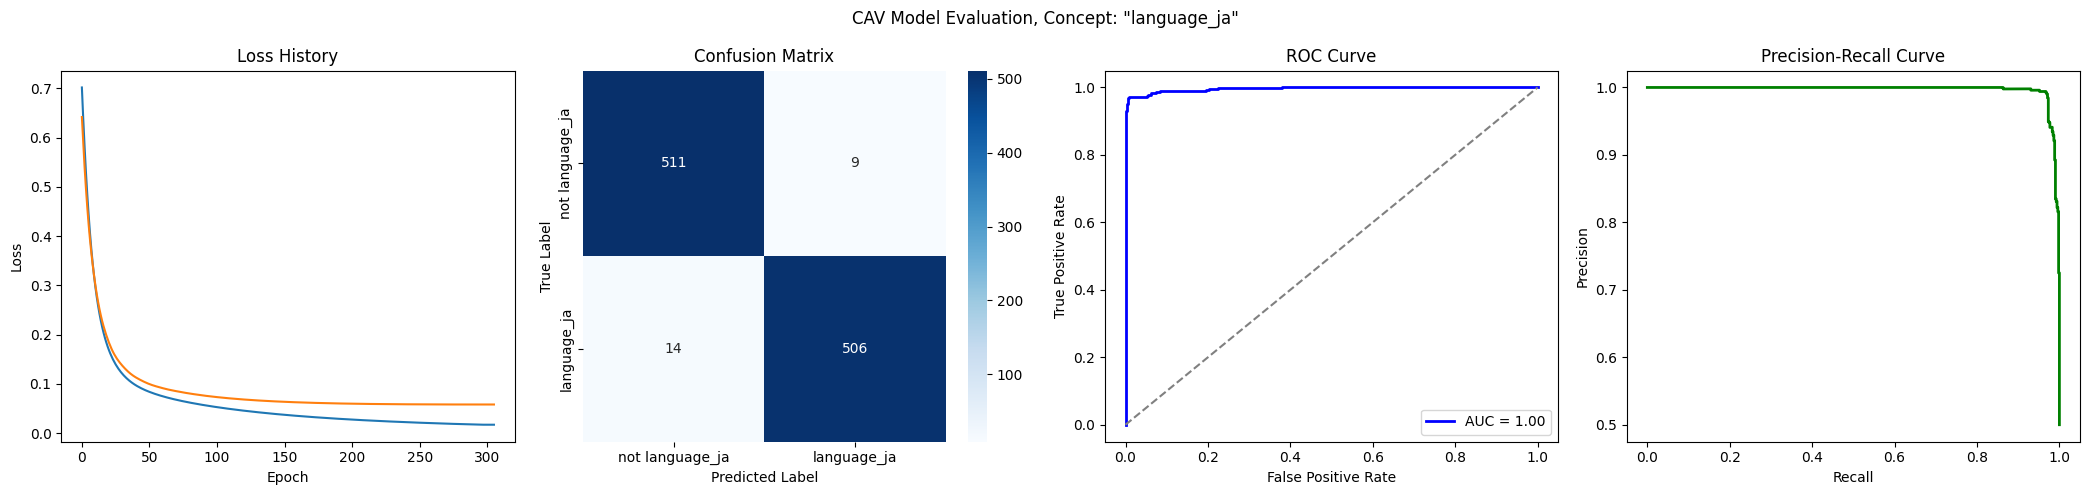


Fitting project: language_ja for encoder: muq_large_msd
Training sample size: 403
Validation sample size: 45
Test sample size: 1040
Early stopping at epoch 117
Training completed. Saving loss history to trainings/language_ja/


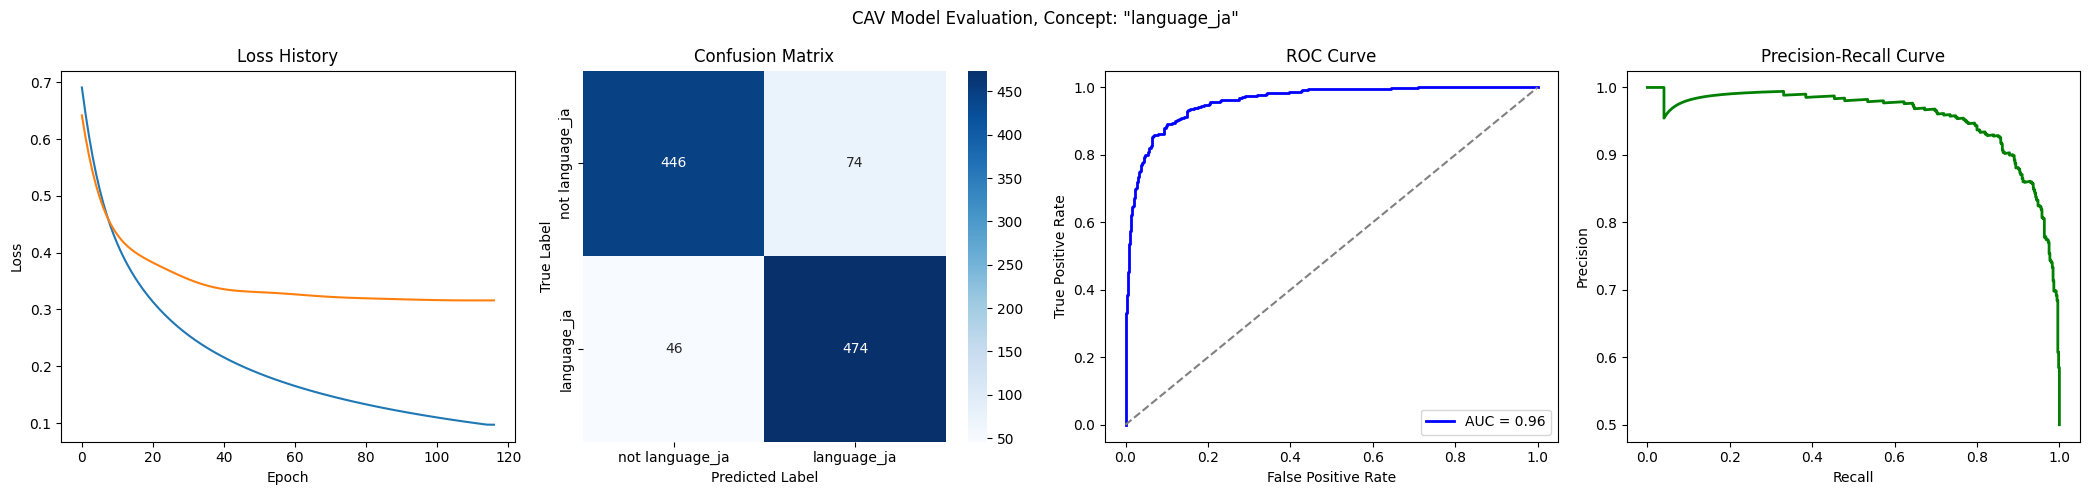


Fitting project: language_ja for encoder: muq_mulan_large
Training sample size: 403
Validation sample size: 45
Test sample size: 1040
Early stopping at epoch 366
Training completed. Saving loss history to trainings/language_ja/


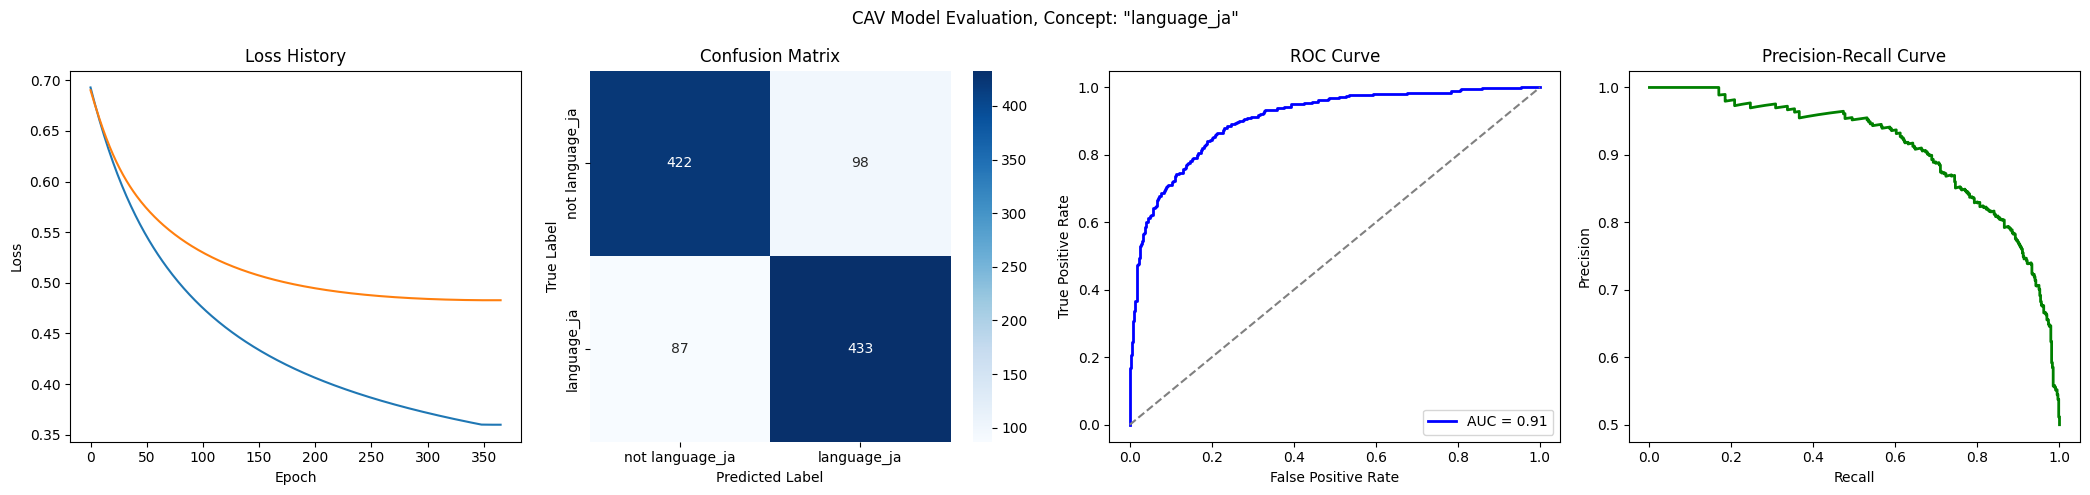


Fitting project: language_pt for encoder: mert_v1_95m
Training sample size: 295
Validation sample size: 33
Test sample size: 830
Early stopping at epoch 73
Training completed. Saving loss history to trainings/language_pt/


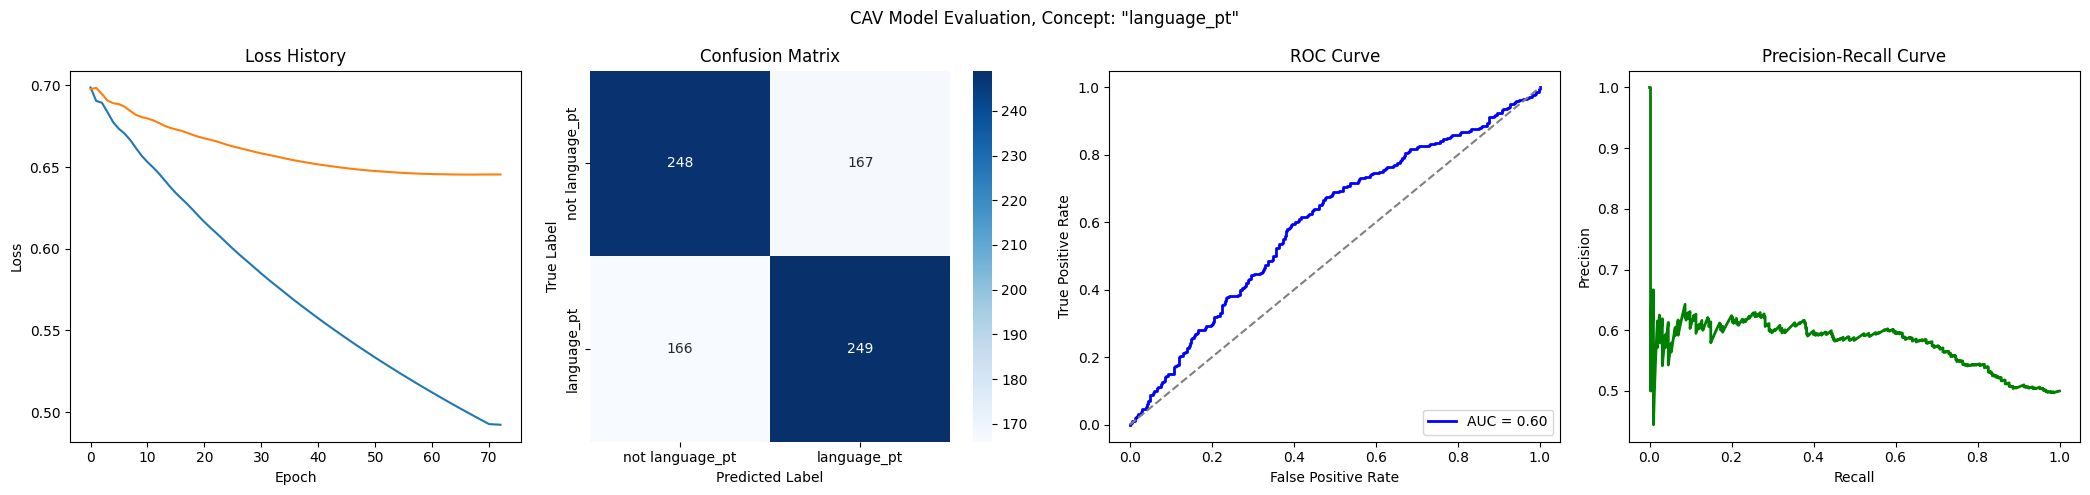


Fitting project: language_pt for encoder: whisper_large_v2
Training sample size: 295
Validation sample size: 33
Test sample size: 830
Training completed. Saving loss history to trainings/language_pt/


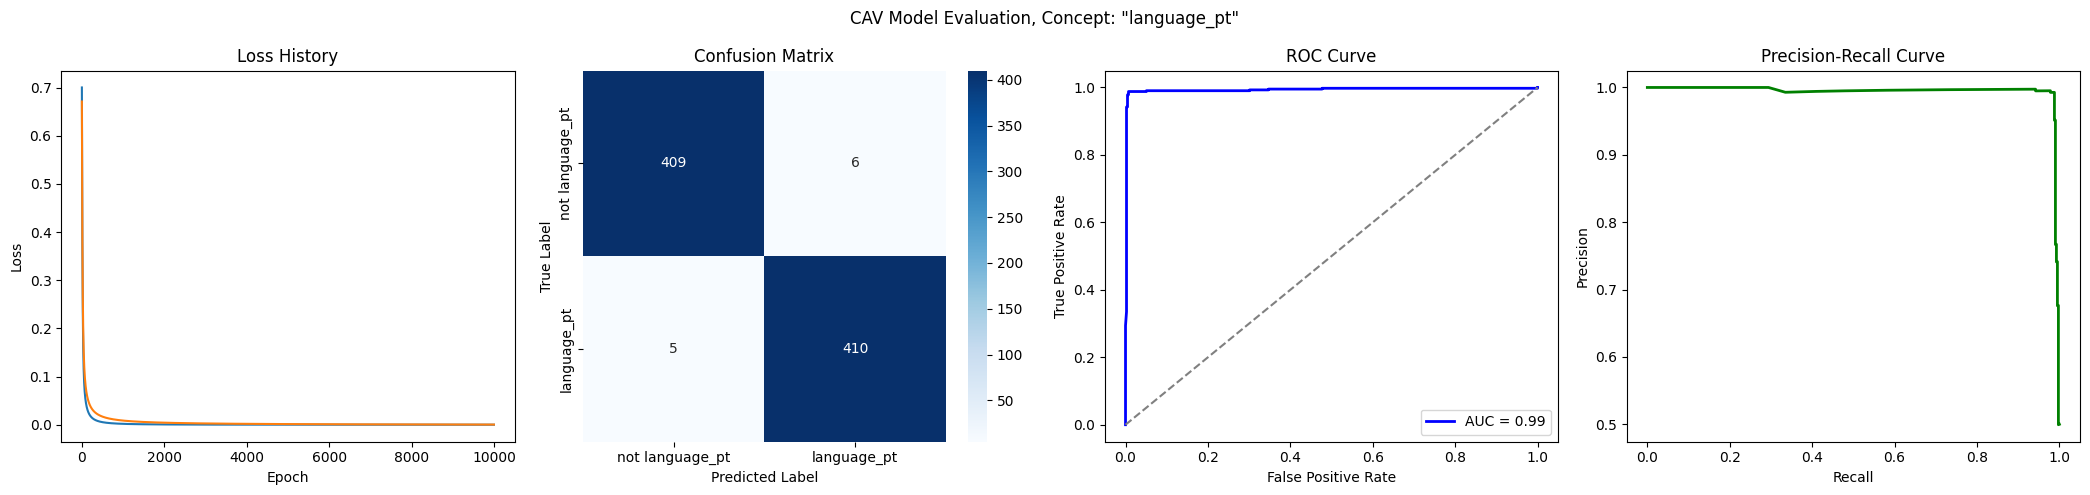


Fitting project: language_pt for encoder: muq_large_msd
Training sample size: 295
Validation sample size: 33
Test sample size: 830
Early stopping at epoch 138
Training completed. Saving loss history to trainings/language_pt/


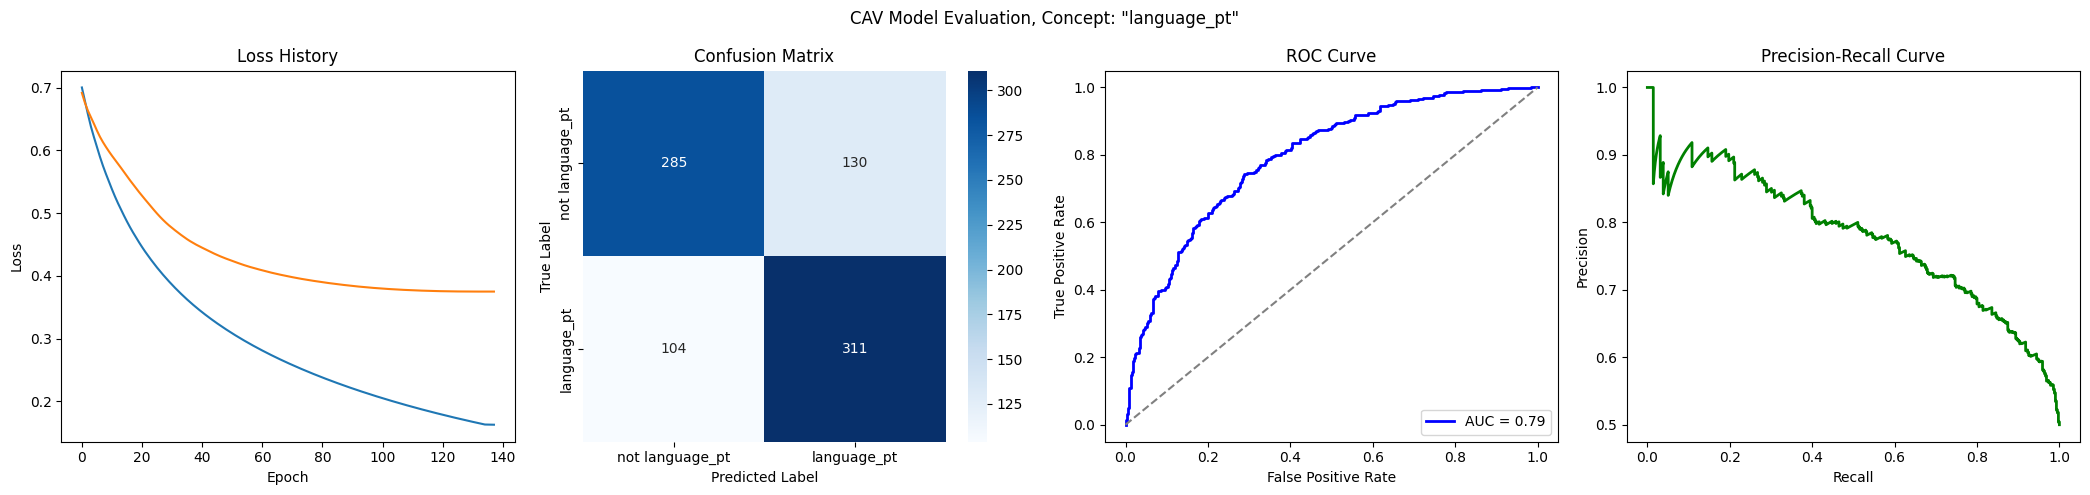


Fitting project: language_pt for encoder: muq_mulan_large
Training sample size: 295
Validation sample size: 33
Test sample size: 830
Early stopping at epoch 149
Training completed. Saving loss history to trainings/language_pt/


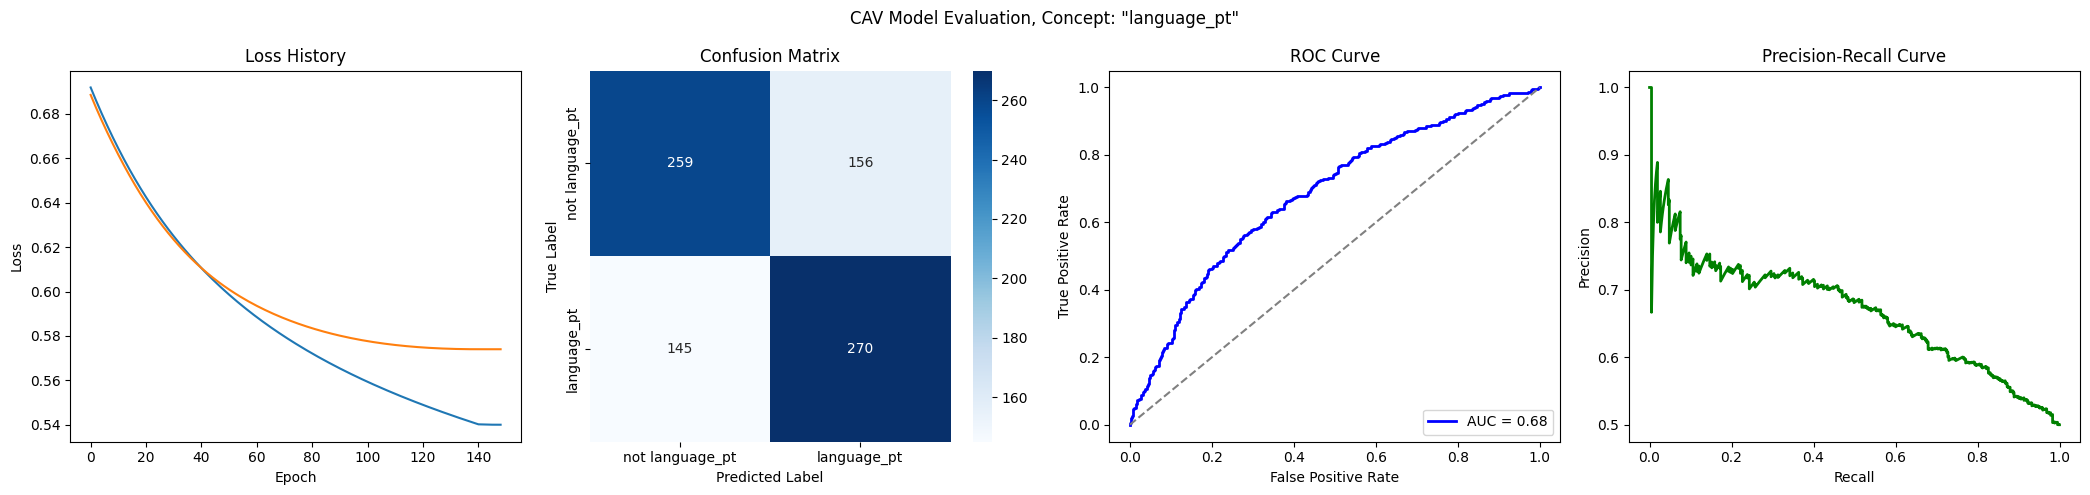

In [10]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    training_sample_size = int(len(df) * train_val_split)
    validation_sample_size = len(df) - training_sample_size

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    test_dataloader = create_in_memory_dataloader(df_test)

    print(f"Training sample size: {training_sample_size}")
    print(f"Validation sample size: {validation_sample_size}")
    print(f"Test sample size: {len(df_test)}")

    cav_weight, cav_bias, evaluation_metric = train_cav_classifier(
        random_state=0,
        df=df,
        project_name=project_name,
        training_sample_size=training_sample_size,
        validation_sample_size=validation_sample_size,
        epochs=epochs,
        learning_rate=learning_rate,
        embedding_dim=embedding_dim,
        dropout_rate=dropout_rate,
        df_test=df_test,
        plot_evaluation=True,
    )

    store_cav_vector_array(
        cav_weight,
        f"cav_weight_full_{project_name}.npy",
        encoder_id,
        project_name,
    )

    store_cav_vector_array(
        cav_bias,
        f"cav_bias_full_{project_name}.npy",
        encoder_id,
        project_name,
    )

    store_evaluation_metrics(
        evaluation_metric,
        f"evaluation_metrics_full_{project_name}.json",
        encoder_id,
        project_name,
    )